In [ ]:
ls!wget https://www.apache.org/dyn/closer.lua/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz
#!wget -q https://www.apache.org/dyn/closer.lua/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz

--2021-02-26 01:17:43--  https://www.apache.org/dyn/closer.lua/spark/spark-3.0.2/spark-3.0.2-bin-hadoop3.2.tgz
Resolving www.apache.org (www.apache.org)... 95.216.26.30, 207.244.88.140, 2a01:4f9:2a:1a61::2
Connecting to www.apache.org (www.apache.org)|95.216.26.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘spark-3.0.2-bin-hadoop3.2.tgz’

spark-3.0.2-bin-had     [ <=>                ]  30.88K   182KB/s    in 0.2s    

2021-02-26 01:17:44 (182 KB/s) - ‘spark-3.0.2-bin-hadoop3.2.tgz’ saved [31624]



In [ ]:
!java -version

openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [ ]:
ls -l

total 4
drwxr-xr-x 1 root root 4096 May  3 13:42 sample_data/


In [ ]:
!tar xf spark-3.0.2-bin-hadoop2.7.tgz


gzip: stdin: not in gzip format
tar: Child returned status 1
tar: Error is not recoverable: exiting now


In [ ]:
ls

sample_data/  spark-3.0.2-bin-hadoop2.7.tgz


In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 39 kB/s 
     |████████████████████████████████| 199 kB 51.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=b77742f0943fa67629d18f3e6fbf835d3e9ce671a760bcac3b1346ac5bbc5a4f
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
!pip install findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#PySpark Prueba

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.master("local[*]").getOrCreate()

sc=spark.sparkContext

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline  
from scipy.interpolate import *

In [ ]:
data = sc.textFile('/content/drive/My Drive/Archivos_Spark/incidentes-viales-c5.csv')

In [ ]:
type(data)

pyspark.rdd.RDD

#Comparación de tiempos


In [ ]:
import time

start = time.time()

# Código
#
#
#
time.sleep(1)
#
#
#


end = time.time()

print(str(end-start))

1.0012695789337158


In [ ]:
##Programa 1
start = time.time()

#Código
time.sleep(0.5)

end= time.time()


##Programa 2
start2=time.time()

#Código
time.sleep(0.501)

end2=time.time()

print(end-start < end2-start2)

True


#Introducción Pandas

##Previsualización de los datos


In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv', nrows = 100000)

In [6]:
#Primeros datos del dataframe
df.head() 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [ ]:
#Ultimos datos del dataframe
df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
99995,2008,1,25,5,2204.0,1935,106.0,2257,XE,7676,N11181,122.0,142,101.0,129.0,149.0,SLC,OKC,866,4.0,17.0,0,NaN,0,0.0,0.0,0.0,0.0,129.0
99996,2008,1,26,6,1933.0,1935,2234.0,2257,XE,7676,N16170,121.0,142,101.0,-23.0,-2.0,SLC,OKC,866,4.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
99997,2008,1,27,7,2047.0,1935,2400.0,2257,XE,7676,N12167,133.0,142,109.0,63.0,72.0,SLC,OKC,866,6.0,18.0,0,NaN,0,23.0,0.0,0.0,0.0,40.0
99998,2008,1,28,1,1956.0,1935,2308.0,2257,XE,7676,N16170,132.0,142,102.0,11.0,21.0,SLC,OKC,866,5.0,25.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
99999,2008,1,29,2,1938.0,1935,2308.0,2257,XE,7676,N11176,150.0,142,104.0,11.0,3.0,SLC,OKC,866,5.0,41.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Mostrar los datos desordenados u aleatoriamente
df.sample(frac=1)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
89773,2008,1,30,3,1643.0,1645,1743.0,1745,WN,3398,N280WN,120.0,120,110.0,-2.0,-2.0,PHX,SMF,647,4.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
46478,2008,1,17,4,1645.0,1550,1759.0,1715,WN,3334,N456WN,74.0,85,54.0,44.0,55.0,LAS,RNO,345,4.0,16.0,0,NaN,0,0.0,0.0,0.0,0.0,44.0
78425,2008,1,27,7,1220.0,1055,1341.0,1215,WN,506,N461WN,81.0,80,55.0,86.0,85.0,LAS,RNO,345,4.0,22.0,0,NaN,0,0.0,0.0,8.0,0.0,78.0
21624,2008,1,9,3,1450.0,1410,1647.0,1615,WN,87,N711HK,117.0,125,107.0,32.0,40.0,SDF,TPA,727,3.0,7.0,0,NaN,0,0.0,0.0,0.0,0.0,32.0
23093,2008,1,10,4,1442.0,1400,1535.0,1455,WN,32,N373SW,53.0,55,41.0,40.0,42.0,HOU,DAL,239,3.0,9.0,0,NaN,0,18.0,0.0,0.0,0.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87497,2008,1,30,3,1837.0,1745,2110.0,2025,WN,1744,N406WN,153.0,160,134.0,45.0,52.0,BUF,MCO,1011,8.0,11.0,0,NaN,0,0.0,0.0,45.0,0.0,0.0
17349,2008,1,8,2,631.0,630,747.0,755,WN,1034,N786SW,76.0,85,58.0,-8.0,1.0,OAK,LAS,407,5.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
53718,2008,1,19,6,846.0,845,1008.0,1010,WN,1751,N375SW,82.0,85,66.0,-2.0,1.0,PDX,SMF,479,5.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
75688,2008,1,26,6,728.0,730,824.0,830,WN,870,N464WN,56.0,60,45.0,-6.0,-2.0,LAS,SAN,258,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Exploración de columnas
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [ ]:
#Tipo de variables por columna
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [ ]:
#Resultado de la base de datos en array
df.values

array([[2008, 1, 3, ..., nan, nan, nan],
       [2008, 1, 3, ..., nan, nan, nan],
       [2008, 1, 3, ..., nan, nan, nan],
       ...,
       [2008, 1, 27, ..., 0.0, 0.0, 40.0],
       [2008, 1, 28, ..., nan, nan, nan],
       [2008, 1, 29, ..., nan, nan, nan]], dtype=object)

In [ ]:
#Crear un nuevo dataframe con datos necesarios

df2=df.head(10)

In [ ]:
df2

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,N428WN,233.0,250,219.0,-18.0,-1.0,IND,LAS,1591,7.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,N689SW,95.0,95,70.0,2.0,2.0,IND,MCI,451,6.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,N648SW,79.0,95,70.0,-16.0,0.0,IND,MCI,451,3.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


##Filtrado de los datos


In [ ]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2008,1,25,5,2204.0,1935,106.0,2257,XE,7676,N11181,122.0,142,101.0,129.0,149.0,SLC,OKC,866,4.0,17.0,0,NaN,0,0.0,0.0,0.0,0.0,129.0
99996,2008,1,26,6,1933.0,1935,2234.0,2257,XE,7676,N16170,121.0,142,101.0,-23.0,-2.0,SLC,OKC,866,4.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
99997,2008,1,27,7,2047.0,1935,2400.0,2257,XE,7676,N12167,133.0,142,109.0,63.0,72.0,SLC,OKC,866,6.0,18.0,0,NaN,0,23.0,0.0,0.0,0.0,40.0
99998,2008,1,28,1,1956.0,1935,2308.0,2257,XE,7676,N16170,132.0,142,102.0,11.0,21.0,SLC,OKC,866,5.0,25.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Obtener datos de una columna
df['ArrDelay'].head()

0   -14.0
1     2.0
2    14.0
3    -6.0
4    34.0
Name: ArrDelay, dtype: float64

In [ ]:
#Obtener valores en un itervalo de filas
df[100:110]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
100,2008,1,3,4,826.0,825,930.0,925,WN,136,N493WN,64.0,60,46.0,5.0,1.0,LAS,BUR,223,2.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
101,2008,1,3,4,2118.0,2015,2224.0,2115,WN,219,N383SW,66.0,60,46.0,69.0,63.0,LAS,BUR,223,3.0,17.0,0,NaN,0,17.0,0.0,6.0,0.0,46.0
102,2008,1,3,4,1818.0,1740,1916.0,1840,WN,391,N608SW,58.0,60,46.0,36.0,38.0,LAS,BUR,223,2.0,10.0,0,NaN,0,20.0,0.0,0.0,0.0,16.0
103,2008,1,3,4,650.0,650,748.0,750,WN,670,N777QC,58.0,60,47.0,-2.0,0.0,LAS,BUR,223,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
104,2008,1,3,4,2146.0,2055,2250.0,2155,WN,815,N626SW,64.0,60,48.0,55.0,51.0,LAS,BUR,223,3.0,13.0,0,NaN,0,4.0,0.0,4.0,0.0,47.0
105,2008,1,3,4,2241.0,1910,2340.0,2010,WN,1072,N369SW,59.0,60,43.0,210.0,211.0,LAS,BUR,223,3.0,13.0,0,NaN,0,114.0,0.0,0.0,0.0,96.0
106,2008,1,3,4,1409.0,1355,1513.0,1500,WN,1328,N396SW,64.0,65,50.0,13.0,14.0,LAS,BUR,223,2.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
107,2008,1,3,4,1100.0,1050,1157.0,1155,WN,1586,N293,57.0,65,46.0,2.0,10.0,LAS,BUR,223,2.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
108,2008,1,3,4,1306.0,1250,1406.0,1355,WN,1838,N509SW,60.0,65,47.0,11.0,16.0,LAS,BUR,223,2.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
109,2008,1,3,4,1726.0,1630,1832.0,1740,WN,2284,N409WN,66.0,70,46.0,52.0,56.0,LAS,BUR,223,2.0,18.0,0,NaN,0,1.0,0.0,0.0,0.0,51.0


In [ ]:
#Vuelos retrasados menos de 60minutos
df[df["ArrDelay"] < 60].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [ ]:
#Vuelos retrasados mas de una hora
df[df["ArrDelay"] > 60].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
49,2008,1,3,4,2245.0,1730,2354.0,1850,WN,186,N792SW,69.0,80,59.0,304.0,315.0,JAN,HOU,359,3.0,7.0,0,NaN,0,282.0,0.0,0.0,0.0,22.0
105,2008,1,3,4,2241.0,1910,2340.0,2010,WN,1072,N369SW,59.0,60,43.0,210.0,211.0,LAS,BUR,223,3.0,13.0,0,NaN,0,114.0,0.0,0.0,0.0,96.0
135,2008,1,3,4,2255.0,1820,509.0,55,WN,1924,N761RR,194.0,215,176.0,254.0,275.0,LAS,IND,1591,9.0,9.0,0,NaN,0,0.0,0.0,0.0,8.0,246.0
273,2008,1,3,4,2021.0,1700,2303.0,1835,WN,2005,N302SW,162.0,95,73.0,268.0,201.0,LAS,SFO,414,4.0,85.0,0,NaN,0,192.0,0.0,67.0,0.0,9.0
276,2008,1,3,4,2301.0,2105,59.0,2240,WN,3061,N447WN,118.0,95,98.0,139.0,116.0,LAS,SFO,414,4.0,16.0,0,NaN,0,0.0,0.0,131.0,0.0,8.0


In [ ]:
#Vuelos retrasados en por una hora
df[df['ArrDelay'] == 60].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
96,2008,1,3,4,2039.0,1930,155.0,55,WN,3940,N434WN,196.0,205,177.0,60.0,69.0,LAS,BNA,1588,5.0,14.0,0,NaN,0,0.0,0.0,22.0,0.0,38.0
423,2008,1,3,4,2117.0,2010,2355.0,2255,WN,1485,N605SW,98.0,105,84.0,60.0,67.0,LAX,SLC,590,4.0,10.0,0,NaN,0,0.0,0.0,1.0,0.0,59.0
610,2008,1,3,4,1942.0,1840,2205.0,2105,WN,3332,N412WN,143.0,145,130.0,60.0,62.0,MCO,ISP,972,4.0,9.0,0,NaN,0,60.0,0.0,0.0,0.0,0.0
1356,2008,1,3,4,1933.0,1835,1955.0,1855,WN,921,N430WN,82.0,80,70.0,60.0,58.0,PHX,BUR,369,2.0,10.0,0,NaN,0,0.0,0.0,3.0,0.0,57.0
3574,2008,1,4,5,1600.0,1510,2355.0,2255,WN,3144,N230WN,295.0,285,277.0,60.0,50.0,LAS,ISP,2283,5.0,13.0,0,NaN,0,5.0,0.0,10.0,0.0,45.0


In [ ]:
#Vuelos que salen de un cierto destino
df[df["Origin"] == "LAS"].tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
99753,2008,1,29,2,852.0,852,1007.0,1000,XE,7667,N14171,75.0,68,44.0,7.0,0.0,LAS,LAX,236,9.0,22.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
99754,2008,1,30,3,850.0,852,1007.0,1000,XE,7667,N14177,77.0,68,42.0,7.0,-2.0,LAS,LAX,236,7.0,28.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
99755,2008,1,31,4,848.0,852,957.0,1000,XE,7667,N14177,69.0,68,43.0,-3.0,-4.0,LAS,LAX,236,6.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
99830,2008,1,6,7,637.0,630,739.0,741,XE,7671,N14173,62.0,71,45.0,-2.0,7.0,LAS,LAX,236,6.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
99831,2008,1,7,1,629.0,630,744.0,741,XE,7671,N12569,75.0,71,42.0,3.0,-1.0,LAS,LAX,236,7.0,26.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Filtrado por más de un parametro
df[(df["Origin"]=="LAS") & (df["ArrDelay"]>60)].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
81,2008,1,3,4,2248.0,2125,102.0,2345,WN,890,N618WN,74.0,80,60.0,77.0,83.0,LAS,ABQ,487,4.0,10.0,0,NaN,0,7.0,0.0,0.0,0.0,70.0
86,2008,1,3,4,1832.0,1655,148.0,30,WN,302,N473WN,256.0,275,243.0,78.0,97.0,LAS,ALB,2237,3.0,10.0,0,NaN,0,8.0,0.0,0.0,0.0,70.0
101,2008,1,3,4,2118.0,2015,2224.0,2115,WN,219,N383SW,66.0,60,46.0,69.0,63.0,LAS,BUR,223,3.0,17.0,0,NaN,0,17.0,0.0,6.0,0.0,46.0
105,2008,1,3,4,2241.0,1910,2340.0,2010,WN,1072,N369SW,59.0,60,43.0,210.0,211.0,LAS,BUR,223,3.0,13.0,0,NaN,0,114.0,0.0,0.0,0.0,96.0
121,2008,1,3,4,2232.0,2115,108.0,5,WN,632,N203WN,96.0,110,77.0,63.0,77.0,LAS,DEN,629,6.0,13.0,0,NaN,0,0.0,0.0,7.0,0.0,56.0


In [ ]:
#Otro tipo de filtro
df[df.Origin.isin(["LAS","ALB"])].head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
79,2008,1,3,4,1538.0,1445,1753.0,1710,WN,500,N799SW,75.0,85,60.0,43.0,53.0,LAS,ABQ,487,4.0,11.0,0,NaN,0,15.0,0.0,0.0,0.0,28.0
80,2008,1,3,4,933.0,935,1151.0,1200,WN,778,N607SW,78.0,85,63.0,-9.0,-2.0,LAS,ABQ,487,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
81,2008,1,3,4,2248.0,2125,102.0,2345,WN,890,N618WN,74.0,80,60.0,77.0,83.0,LAS,ABQ,487,4.0,10.0,0,NaN,0,7.0,0.0,0.0,0.0,70.0
82,2008,1,3,4,1327.0,1230,1550.0,1500,WN,1171,N682SW,83.0,90,65.0,50.0,57.0,LAS,ABQ,487,3.0,15.0,0,NaN,0,50.0,0.0,0.0,0.0,0.0
83,2008,1,3,4,624.0,625,846.0,850,WN,1320,N456WN,82.0,85,61.0,-4.0,-1.0,LAS,ABQ,487,4.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Valores nulos en la columna tal
df[pd.isna(df["ArrDelay"])].head(15)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
178,2008,1,3,4,NaN,700,NaN,830,WN,126,NaN,NaN,90,NaN,NaN,NaN,LAS,OAK,407,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
373,2008,1,3,4,NaN,1100,NaN,1215,WN,1146,NaN,NaN,75,NaN,NaN,NaN,LAX,OAK,337,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
399,2008,1,3,4,NaN,905,NaN,1025,WN,469,NaN,NaN,80,NaN,NaN,NaN,LAX,SFO,337,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
401,2008,1,3,4,NaN,1620,NaN,1740,WN,618,NaN,NaN,80,NaN,NaN,NaN,LAX,SFO,337,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
415,2008,1,3,4,NaN,1930,NaN,2035,WN,2528,NaN,NaN,65,NaN,NaN,NaN,LAX,SJC,308,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
676,2008,1,3,4,NaN,845,NaN,1140,WN,437,NaN,NaN,115,NaN,NaN,NaN,MDW,BDL,777,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
686,2008,1,3,4,NaN,1925,NaN,2045,WN,934,NaN,NaN,80,NaN,NaN,NaN,MDW,BNA,395,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
727,2008,1,3,4,NaN,600,NaN,805,WN,3326,NaN,NaN,65,NaN,NaN,NaN,MDW,DTW,229,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
881,2008,1,3,4,NaN,1110,NaN,1215,WN,1402,NaN,NaN,65,NaN,NaN,NaN,MDW,STL,251,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
884,2008,1,3,4,NaN,1445,NaN,1550,WN,2205,NaN,NaN,65,NaN,NaN,NaN,MDW,STL,251,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df[pd.isna(df["ArrDelay"])])

1302

##Transformaciones de las bases de datos

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv')

In [ ]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [ ]:
df["HoursDelay"]=round(df["ArrDelay"]/60)

In [ ]:
df["HoursDelay"].head()

0   -0.0
1    0.0
2    0.0
3   -0.0
4    1.0
Name: HoursDelay, dtype: float64

In [ ]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,HoursDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,-0.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,-0.0
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,1.0


In [ ]:
#Eliminar una columna   
del(df["ArrDelay"])

In [ ]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,HoursDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,-0.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,-0.0
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,1.0


In [ ]:
#Borrar varias columnas
df.drop(["Diverted","Cancelled","Year"],axis=1,inplace=True)

In [ ]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,HoursDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,8.0,IAD,TPA,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.0
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,19.0,IAD,TPA,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,8.0,IND,BWI,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-4.0,IND,BWI,515,3.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.0
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,IND,BWI,515,3.0,10.0,NaN,2.0,0.0,0.0,0.0,32.0,1.0


In [ ]:
#Eliminar las primeras filas
df.drop(0)


,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,NaN,2.0,0.0,0.0,0.0,32.0
5,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009723,12,13,6,1002.0,959,1204.0,1150,DL,1636,N646DL,122.0,111.0,71.0,14.0,3.0,ATL,IAD,533,6.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN
7009724,12,13,6,834.0,835,1021.0,1023,DL,1637,N908DL,167.0,168.0,139.0,-2.0,-1.0,ATL,SAT,874,5.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
7009725,12,13,6,655.0,700,856.0,856,DL,1638,N671DN,121.0,116.0,85.0,0.0,-5.0,PBI,ATL,545,24.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
7009726,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Eliminar filas con rangos
df.drop(range(0,1000000))

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1000000,2,18,1,1724.0,1655,2024.0,2005,MQ,4695,N721HS,120.0,130.0,104.0,19.0,29.0,MCI,RDU,904,4.0,12.0,NaN,0.0,0.0,0.0,0.0,19.0
1000001,2,19,2,1713.0,1655,2007.0,2005,MQ,4695,N706RG,114.0,130.0,100.0,2.0,18.0,MCI,RDU,904,3.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
1000002,2,20,3,1709.0,1655,2022.0,2005,MQ,4695,N707EB,133.0,130.0,116.0,17.0,14.0,MCI,RDU,904,4.0,13.0,NaN,0.0,0.0,3.0,0.0,14.0
1000003,2,21,4,1719.0,1655,2054.0,2005,MQ,4695,N710TB,155.0,130.0,116.0,49.0,24.0,MCI,RDU,904,4.0,35.0,NaN,0.0,4.0,25.0,0.0,20.0
1000004,2,22,5,1713.0,1655,2019.0,2005,MQ,4695,N701MH,126.0,130.0,114.0,14.0,18.0,MCI,RDU,904,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009723,12,13,6,1002.0,959,1204.0,1150,DL,1636,N646DL,122.0,111.0,71.0,14.0,3.0,ATL,IAD,533,6.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN
7009724,12,13,6,834.0,835,1021.0,1023,DL,1637,N908DL,167.0,168.0,139.0,-2.0,-1.0,ATL,SAT,874,5.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
7009725,12,13,6,655.0,700,856.0,856,DL,1638,N671DN,121.0,116.0,85.0,0.0,-5.0,PBI,ATL,545,24.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN
7009726,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Crear dos nuevos dataframes con origen definido
dfATL=df[df.Origin=="ATL"]
dfHOU=df[df.Origin=="HOU"]

In [ ]:
#Creación de un nuevo dataframe con la misma estructura
newdf=dfATL.append(dfHOU)

In [ ]:
newdf.Origin

103149     ATL
103572     ATL
104019     ATL
104124     ATL
104485     ATL
          ... 
7003419    HOU
7004690    HOU
7005947    HOU
7007233    HOU
7008545    HOU
Name: Origin, Length: 470446, dtype: object

##GroupBy: obtener información esencial


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv')

In [ ]:
#Media del tiempo de retraso por dia de la semana
df.groupby(by="DayOfWeek")["ArrDelay"].mean()

DayOfWeek
1     8.210850
2     7.481208
3     6.522017
4     8.411599
5    10.953440
6     5.789666
7     9.495886
Name: ArrDelay, dtype: float64

In [ ]:
#Retrasos de vuelos por día de la semana
df.groupby(by="DayOfWeek")["ArrDelay"].count()

DayOfWeek
1    1013410
2    1005992
3    1016995
4    1011970
5    1008872
6     841663
7     956127
Name: ArrDelay, dtype: int64

In [ ]:
#Resumen estadistico
df.groupby(by="DayOfWeek")["ArrDelay"].describe()

,count,mean,std,min,25%,50%,75%,max
DayOfWeek,,,,,,,,
1,1013410.0,8.210850,38.013811,-519.0,-10.0,-2.0,12.0,1583.0
2,1005992.0,7.481208,38.361073,-89.0,-11.0,-3.0,11.0,1951.0
3,1016995.0,6.522017,36.024679,-87.0,-10.0,-3.0,10.0,1510.0
4,1011970.0,8.411599,37.397411,-129.0,-10.0,-1.0,12.0,2453.0
5,1008872.0,10.953440,40.252320,-86.0,-9.0,0.0,15.0,1707.0
6,841663.0,5.789666,37.163120,-91.0,-11.0,-3.0,9.0,1525.0
7,956127.0,9.495886,41.759296,-92.0,-10.0,-2.0,12.0,2461.0


In [ ]:
#Evaluación de dos columnas con mismo tipo de dato
df.groupby(by="DayOfWeek")["ArrDelay","DepDelay"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,ArrDelay,DepDelay
DayOfWeek,,
1,8.210850,10.269990
2,7.481208,8.976897
3,6.522017,8.289761
4,8.411599,9.772897
5,10.953440,12.158036
6,5.789666,8.645681
7,9.495886,11.568973


In [ ]:
#Rango de valores para cada día de la semana
df.groupby(by="DayOfWeek")["ArrDelay"].max() - df.groupby(by="DayOfWeek")["ArrDelay"].min()

DayOfWeek
1    2102.0
2    2040.0
3    1597.0
4    2582.0
5    1793.0
6    1616.0
7    2553.0
Name: ArrDelay, dtype: float64

In [ ]:
dfATLHOU=df[df.Origin.isin(["ATL","HOU"])]

In [ ]:
#Para cada día de la semana comparar la medoa de ATL y HOU
dfATLHOU.groupby(by = ["DayOfWeek","Origin"])["ArrDelay"].mean()

DayOfWeek  Origin
1          ATL        9.123436
           HOU        6.356856
2          ATL        8.933587
           HOU        9.348112
3          ATL        8.809146
           HOU        9.073109
4          ATL       10.186501
           HOU       12.994016
5          ATL       14.797440
           HOU       11.036545
6          ATL        9.511662
           HOU        4.283933
7          ATL       13.798627
           HOU        7.045287
Name: ArrDelay, dtype: float64

In [ ]:
mygroupby=dfATLHOU.groupby(by = ["Origin","DayOfWeek"])["ArrDelay"]

In [ ]:
mygroupby.describe()

count       mean        std   min   25%  50%   75%     max
Origin DayOfWeek                                                              
ATL    1          60598.0   9.123436  30.958642 -69.0  -8.0  1.0  14.0   407.0
       2          59732.0   8.933587  34.750658 -89.0  -9.0 -1.0  13.0   848.0
       3          60245.0   8.809146  34.343042 -56.0  -9.0  0.0  13.0   876.0
       4          59721.0  10.186501  35.261512 -51.0  -8.0  1.0  15.0   571.0
       5          60007.0  14.797440  38.859778 -51.0  -7.0  3.0  20.0   699.0
       6          49734.0   9.511662  36.020584 -61.0 -10.0 -1.0  15.0   483.0
       7          57664.0  13.798627  42.466233 -86.0  -8.0  1.0  17.0   612.0
HOU    1           8205.0   6.356856  28.887113 -47.0  -7.0 -2.0   9.0   383.0
       2           8368.0   9.348112  35.321852 -44.0  -7.0 -1.0  12.0   546.0
       3           8330.0   9.073109  33.191673 -39.0  -7.0 -1.0  12.0   639.0
       4           8188.0  12.994016  39.360946 -42.0  -6.0  1.0  17.0  1082.0
       5           8209.0  11.036545  32.415069 -48.0  -6.0  1.0  16.0   560.0
       6           5614.0   4.283933  32.518381 -47.0  -9.0 -3.0   6.0   917.0
       7           7331.0   7.045287  30.820505 -55.0  -7.0 -1.0  11.0   685.0

##Tratar datos duplicados y perdidos


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv',nrows=1e6)

In [ ]:
df.count

<bound method DataFrame.count of         Year  Month  DayofMonth  ...  NASDelay  SecurityDelay  LateAircraftDelay
0       2008      1           3  ...       NaN            NaN                NaN
1       2008      1           3  ...       NaN            NaN                NaN
2       2008      1           3  ...       NaN            NaN                NaN
3       2008      1           3  ...       NaN            NaN                NaN
4       2008      1           3  ...       0.0            0.0               32.0
...      ...    ...         ...  ...       ...            ...                ...
999995  2008      2          12  ...       NaN            NaN                NaN
999996  2008      2          13  ...       NaN            NaN                NaN
999997  2008      2          14  ...       NaN            NaN                NaN
999998  2008      2          15  ...       NaN            NaN                NaN
999999  2008      2          17  ...       NaN            NaN               

In [ ]:
#Generar un nuevo dataframe que si se encuentr duplicado
dfduplicate=df.append(df)

In [ ]:
dfduplicate.count

<bound method DataFrame.count of         Year  Month  DayofMonth  ...  NASDelay  SecurityDelay  LateAircraftDelay
825963  2008      2          29  ...       NaN            NaN                NaN
274818  2008      1          15  ...       NaN            NaN                NaN
451200  2008      1          29  ...       NaN            NaN                NaN
76544   2008      1          26  ...       NaN            NaN                NaN
498646  2008      1          29  ...      77.0            0.0                9.0
...      ...    ...         ...  ...       ...            ...                ...
902764  2008      2          24  ...       NaN            NaN                NaN
362913  2008      1          13  ...       NaN            NaN                NaN
559756  2008      1          26  ...       NaN            NaN                NaN
286475  2008      1          24  ...       NaN            NaN                NaN
224129  2008      1          28  ...       NaN            NaN               

In [ ]:
dfduplicate.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
825963,2008,2,29,5,659.0,634,950.0,936,UA,520,N914UA,111.0,122.0,94.0,14.0,25.0,ORD,BDL,783,4.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
274818,2008,1,15,2,1002.0,1000,1255.0,1252,US,1977,N763US,173.0,172.0,139.0,3.0,2.0,PHL,PBI,951,6.0,28.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
451200,2008,1,29,2,803.0,815,1004.0,1009,NW,1654,N325NB,181.0,174.0,154.0,-5.0,-12.0,RDU,MSP,981,7.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
76544,2008,1,26,6,606.0,605,602.0,605,WN,3508,N514SW,56.0,60.0,43.0,-3.0,1.0,PHX,LAS,256,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
498646,2008,1,29,2,1253.0,1200,1501.0,1335,AA,1102,N3CLAA,128.0,95.0,84.0,86.0,53.0,MSY,DFW,448,10.0,34.0,0,NaN,0,0.0,0.0,77.0,0.0,9.0


In [ ]:
#Reordenar
dfduplicate=dfduplicate.sample(frac=1)

In [ ]:
dfduplicate.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
179743,2008,1,7,1,648.0,623,754.0,709,OO,5700,N290SW,66.0,46.0,28.0,45.0,25.0,EUG,PDX,106,3.0,35.0,0,NaN,0,45.0,0.0,0.0,0.0,0.0
44089,2008,1,16,3,1843.0,1825,2005.0,1950,WN,1186,N288WN,142.0,145.0,109.0,15.0,18.0,PHL,MDW,668,5.0,28.0,0,NaN,0,15.0,0.0,0.0,0.0,0.0
226008,2008,1,20,7,1558.0,1512,2343.0,2317,UA,294,N435UA,285.0,305.0,266.0,26.0,46.0,SFO,BWI,2457,4.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,26.0
675487,2008,2,24,7,1820.0,1815,1920.0,1915,WN,217,N645SW,60.0,60.0,46.0,5.0,5.0,HOU,MSY,303,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
277863,2008,1,18,5,1442.0,1440,1635.0,1652,US,1410,N946UW,113.0,132.0,91.0,-17.0,2.0,ATL,PHL,665,2.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Eliminar casos duplicados
dfclean=dfduplicate.drop_duplicates()

In [ ]:
dfclean.count

<bound method DataFrame.count of         Year  Month  DayofMonth  ...  NASDelay  SecurityDelay  LateAircraftDelay
179743  2008      1           7  ...       0.0            0.0                0.0
44089   2008      1          16  ...       0.0            0.0                0.0
226008  2008      1          20  ...       0.0            0.0               26.0
675487  2008      2          24  ...       NaN            NaN                NaN
277863  2008      1          18  ...       NaN            NaN                NaN
...      ...    ...         ...  ...       ...            ...                ...
689830  2008      2          28  ...       NaN            NaN                NaN
720558  2008      2          16  ...       NaN            NaN                NaN
433784  2008      1          16  ...       NaN            NaN                NaN
338793  2008      1          29  ...       NaN            NaN                NaN
980813  2008      2          11  ...       NaN            NaN               

In [ ]:
#comparar para ver si elimino datos realmente
len(dfclean)==len(df)

False

In [ ]:
len(dfclean)

999996

In [ ]:
#Eliminar duplicados por una columna
dfclean.drop_duplicates(subset="DayofMonth")

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
179743,2008,1,7,1,648.0,623,754.0,709,OO,5700,N290SW,66.0,46.0,28.0,45.0,25.0,EUG,PDX,106,3.0,35.0,0,NaN,0,45.0,0.0,0.0,0.0,0.0
44089,2008,1,16,3,1843.0,1825,2005.0,1950,WN,1186,N288WN,142.0,145.0,109.0,15.0,18.0,PHL,MDW,668,5.0,28.0,0,NaN,0,15.0,0.0,0.0,0.0,0.0
226008,2008,1,20,7,1558.0,1512,2343.0,2317,UA,294,N435UA,285.0,305.0,266.0,26.0,46.0,SFO,BWI,2457,4.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,26.0
675487,2008,2,24,7,1820.0,1815,1920.0,1915,WN,217,N645SW,60.0,60.0,46.0,5.0,5.0,HOU,MSY,303,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
277863,2008,1,18,5,1442.0,1440,1635.0,1652,US,1410,N946UW,113.0,132.0,91.0,-17.0,2.0,ATL,PHL,665,2.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
884902,2008,2,1,5,740.0,730,1017.0,1010,WN,1746,N368SW,97.0,100.0,83.0,7.0,10.0,BNA,BWI,588,3.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
383188,2008,1,22,2,858.0,900,1015.0,1025,MQ,3207,N304AE,77.0,85.0,60.0,-10.0,-2.0,DFW,AEX,285,2.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
576608,2008,1,5,6,1201.0,1200,1654.0,1641,CO,472,N73406,233.0,221.0,206.0,13.0,1.0,EWR,SJU,1608,6.0,21.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
409024,2008,1,9,3,810.0,810,1004.0,1010,MQ,4253,N675AE,114.0,120.0,97.0,-6.0,0.0,ORD,ICT,588,4.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
890346,2008,2,14,4,851.0,700,951.0,801,DL,1626,N909DL,120.0,121.0,99.0,110.0,111.0,ATL,ORD,606,7.0,14.0,0,NaN,0,110.0,0.0,0.0,0.0,0.0


In [ ]:
#Eliminar datos faltantes
df.dropna()


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay


In [ ]:
#Eliminar datos faltante con un minimo de columnas de datos faltantes
df.dropna(thresh=25)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,NaN,0,8.0,0.0,0.0,0.0,72.0
16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,NaN,0,3.0,0.0,0.0,0.0,12.0
18,2008,1,3,4,1323.0,1255,1526.0,1510,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999973,2008,2,23,6,1306.0,1235,1514.0,1415,MQ,4694,N845AE,128.0,100.0,75.0,59.0,31.0,JFK,RDU,426,3.0,50.0,0,NaN,0,31.0,0.0,28.0,0.0,0.0
999983,2008,2,28,4,1458.0,1235,1645.0,1415,MQ,4694,N736DT,107.0,100.0,67.0,150.0,143.0,JFK,RDU,426,3.0,37.0,0,NaN,0,0.0,0.0,7.0,0.0,143.0
999988,2008,2,4,1,1754.0,1655,2056.0,2005,MQ,4695,N727AE,122.0,130.0,111.0,51.0,59.0,MCI,RDU,904,2.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,51.0
999989,2008,2,5,2,1812.0,1655,2129.0,2005,MQ,4695,N729AE,137.0,130.0,121.0,84.0,77.0,MCI,RDU,904,4.0,12.0,0,NaN,0,10.0,0.0,7.0,0.0,67.0


In [ ]:
#df.dropna(thresh=len(df.columns)-2)

In [ ]:
#filtrar por una columna en concreto
df.dropna(subset=["CancellationCode"])

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
178,2008,1,3,4,NaN,700,NaN,830,WN,126,NaN,NaN,90.0,NaN,NaN,NaN,LAS,OAK,407,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
373,2008,1,3,4,NaN,1100,NaN,1215,WN,1146,NaN,NaN,75.0,NaN,NaN,NaN,LAX,OAK,337,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
399,2008,1,3,4,NaN,905,NaN,1025,WN,469,NaN,NaN,80.0,NaN,NaN,NaN,LAX,SFO,337,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
401,2008,1,3,4,NaN,1620,NaN,1740,WN,618,NaN,NaN,80.0,NaN,NaN,NaN,LAX,SFO,337,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
415,2008,1,3,4,NaN,1930,NaN,2035,WN,2528,NaN,NaN,65.0,NaN,NaN,NaN,LAX,SJC,308,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999913,2008,2,11,1,NaN,855,NaN,1210,MQ,4693,NaN,NaN,135.0,NaN,NaN,NaN,MCI,RDU,904,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
999919,2008,2,17,7,NaN,855,NaN,1210,MQ,4693,NaN,NaN,135.0,NaN,NaN,NaN,MCI,RDU,904,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
999961,2008,2,17,7,NaN,1445,NaN,1630,MQ,4694,NaN,NaN,165.0,NaN,NaN,NaN,RDU,MCI,904,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
999971,2008,2,22,5,NaN,1235,NaN,1415,MQ,4694,NaN,NaN,100.0,NaN,NaN,NaN,JFK,RDU,426,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN


##Introducción a la librería Numpy


In [ ]:
import numpy as np

In [ ]:
valoraciones=np.array([[8,7,8,5],[2,6,8,1],[8,8,9,5]])
valoraciones

array([[8, 7, 8, 5],
       [2, 6, 8, 1],
       [8, 8, 9, 5]])

In [ ]:
valoraciones[0][1]

7

In [ ]:
valoraciones[0,1]

7

In [ ]:
valoraciones2=np.array([[[8,7,8,5],[2,6,8,1]], [[8,7,8,5],[2,6,8,1]], [[8,7,8,5],[2,6,8,1]]])

In [ ]:
valoraciones2

array([[[8, 7, 8, 5],
        [2, 6, 8, 1]],

       [[8, 7, 8, 5],
        [2, 6, 8, 1]],

       [[8, 7, 8, 5],
        [2, 6, 8, 1]]])

In [ ]:
valoraciones2[0,1,2]

8

In [ ]:
#Crear una matriz de ceros
np.zeros((3,2,4))

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [ ]:
#Sumar una matriz de la misma dimensionalidad
valoraciones2+np.ones((3,2,4))

array([[[9., 8., 9., 6.],
        [3., 7., 9., 2.]],

       [[9., 8., 9., 6.],
        [3., 7., 9., 2.]],

       [[9., 8., 9., 6.],
        [3., 7., 9., 2.]]])

In [ ]:
#Media de un array
np.mean(valoraciones2)

5.625

In [ ]:
#Media de una dimensión de un array 
np.mean(valoraciones2,axis=2)

array([[7.  , 4.25],
       [7.  , 4.25],
       [7.  , 4.25]])

In [ ]:
#Convertir una lista a las dimensiones que nosotros quieramos
np.reshape([1,2,3,4,5,6,7,8,9,10,11,12],(3,2,2))

array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]]])

#Gestión de datos avanzada

#Visualización de datos Matplotlib


##Introducción Matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv')

In [ ]:
#Tabla resumen de los datos cancelados
data=np.unique(df.Cancelled, return_counts=True)
data

(array([0, 1]), array([6872294,  137434]))

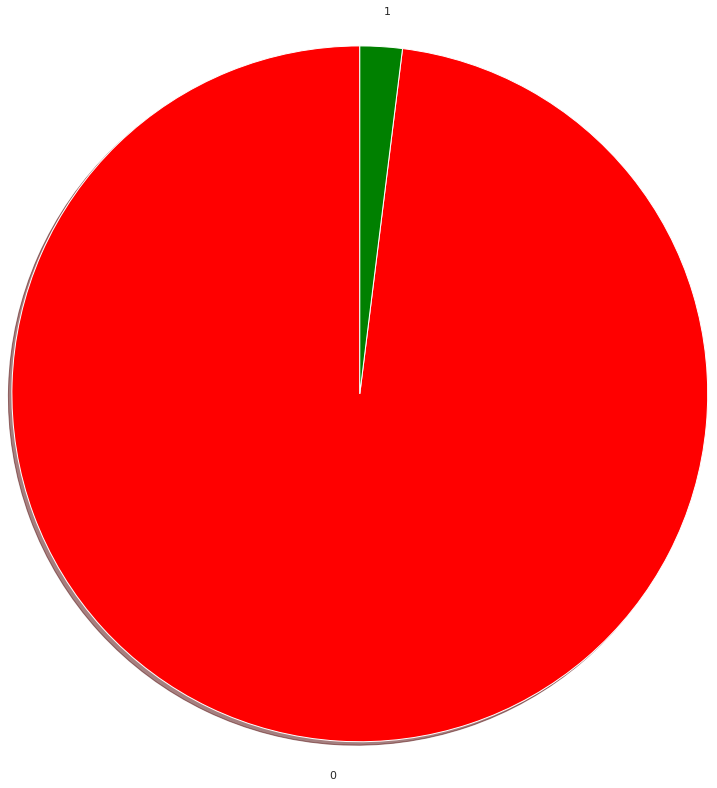

In [ ]:
plt.pie(x=data[1],
        labels=data[0],
        colors=["Red","Green"],
        shadow=True,
        startangle=90,
        radius=2
        )
plt.show()

##Modificar elementos del gráfico en Matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv')
df=df.sample(frac=1).head(100)

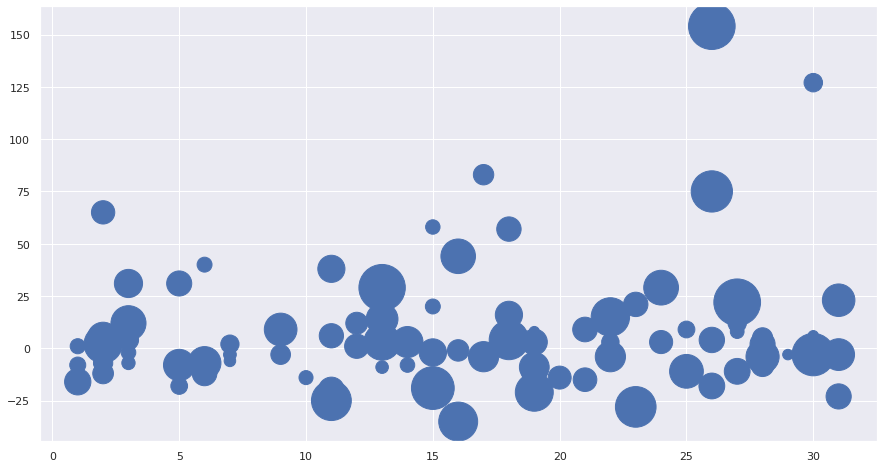

In [ ]:
plt.scatter(x=df.DayofMonth,y=df.ArrDelay,s=df.Distance)

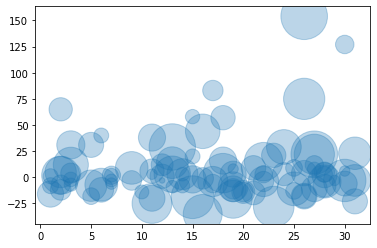

In [ ]:
plt.scatter(x=df.DayofMonth,y=df.ArrDelay,s=df.Distance,alpha=.3)

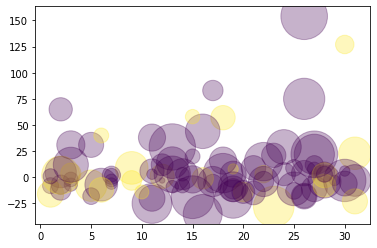

In [ ]:
plt.scatter(x=df.DayofMonth,y=df.ArrDelay,s=df.Distance,alpha=.3,c=df.DayOfWeek.isin([6,7]))

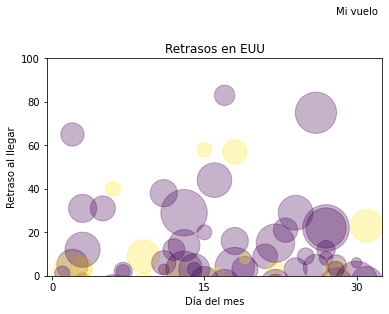

In [ ]:
plt.scatter(x=df.DayofMonth,y=df.ArrDelay,s=df.Distance,alpha=.3,c=df.DayOfWeek.isin([6,7]))
plt.title("Retrasos en EUU")
plt.xlabel("Día del mes")
plt.ylabel("Retraso al llegar")
plt.ylim([0,100])
plt.xticks([0,15,30])
plt.text(x=28,y=120,s="Mi vuelo")
plt.show()

##Etiquetas y leyendas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv')



In [ ]:
data=np.unique(df.DayOfWeek,return_counts=True)
labs=["Lun","Mar","Mie","Jue","Vie","Sab","Dom"]
data

(array([1, 2, 3, 4, 5, 6, 7]),
 array([1036201, 1032049, 1039665, 1032224, 1035166,  857536,  976887]))

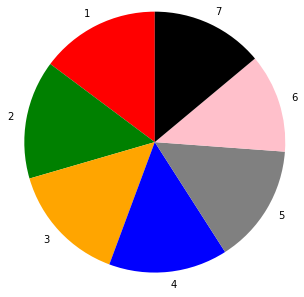

In [ ]:
plt.pie(x=data[1],
        labels=data[0],
        radius=1.5,
        colors=["Red","Green","Orange","Blue","Gray","Pink","Black"],
        startangle=90
        )
plt.show()

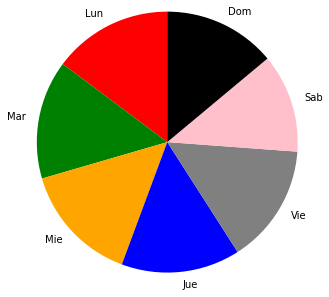

In [ ]:
plt.pie(x=data[1],
        labels=labs,
        radius=1.5,
        colors=["Red","Green","Orange","Blue","Gray","Pink","Black"],
        startangle=90
        )
plt.show()

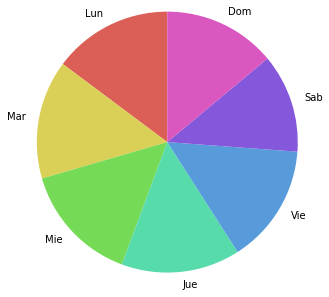

In [ ]:
plt.pie(x=data[1],
        labels=labs,
        radius=1.5,
        colors=sns.color_palette("hls",7),
        startangle=90
        )
plt.show()

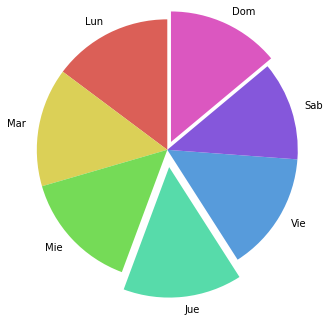

In [ ]:
plt.pie(x=data[1],
        labels=labs,
        radius=1.5,
        colors=sns.color_palette("hls",7),
        explode=(0,0,0,0.2,0,0,0.1),
        startangle=90
        )
plt.show()

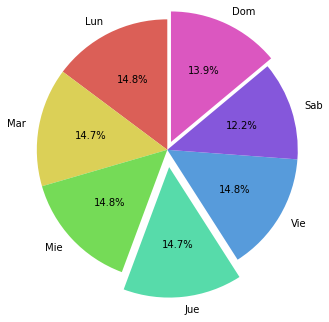

In [ ]:
plt.pie(x=data[1],
        labels=labs,
        radius=1.5,
        colors=sns.color_palette("hls",7),
        explode=(0,0,0,0.2,0,0,0.1),
        startangle=90,
        autopct="%1.1f%%"
        )
plt.show()

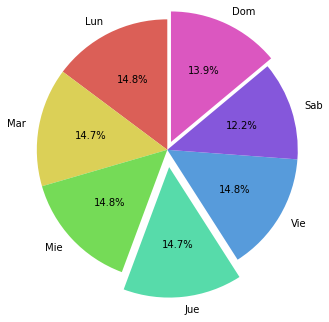

In [ ]:
plt.pie(x=data[1],
        labels=labs,
        radius=1.5,
        colors=sns.color_palette("hls",7),
        explode=(0,0,0,0.2,0,0,0.1),
        startangle=90,
        autopct="%1.1f%%",
        labeldistance=1.1
        )
plt.show()

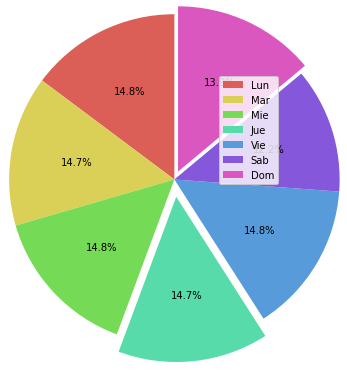

In [ ]:
plt.pie(x=data[1],
        radius=1.9,
        colors=sns.color_palette("hls",7),
        explode=(0,0,0,0.2,0,0,0.1),
        startangle=90,
        autopct="%1.1f%%"
        )
plt.legend(loc="best",labels=labs)
plt.show()

[Text(0, 0.5, 'Número de vuelos'), Text(0.5, 0, 'Día de la semana')]

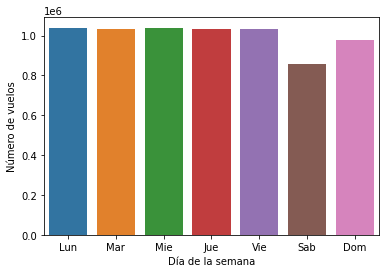

In [ ]:
plt=sns.barplot(x=labs,y=data[1])
plt.set(xlabel="Día de la semana", ylabel="Número de vuelos")

##Gráficos para series temporales

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv')

In [ ]:
df2=df[df["Origin"].isin(["ATL","HOU","IND"])] #Nuevos dataset que tengan en origen estos tres aeropuertos
df=df.head(500000)

In [ ]:
times=[]
for i in np.arange(len(df)):
  times.append(datetime.datetime(year=2008,month=df.loc[i,"Month"],day=df.loc[i,"DayofMonth"]))

In [ ]:
times[50000]

datetime.datetime(2008, 1, 18, 0, 0)

In [ ]:
df["Time"]=times

In [ ]:
data=df.groupby(by=["Time"],as_index=False)["DepDelay","ArrDelay"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
data.head()

,Time,DepDelay,ArrDelay
0,2008-01-01,20.545599,20.999240
1,2008-01-02,23.324222,22.131194
2,2008-01-03,16.697759,14.479569
3,2008-01-04,14.058087,11.851733
4,2008-01-05,18.381555,17.138031


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


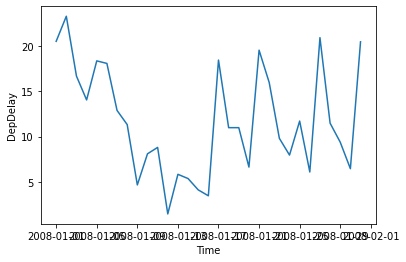

In [ ]:
sns.lineplot(data["Time"],data["DepDelay"])

In [ ]:
data=df.groupby(by=["Time"])["DepDelay","ArrDelay"].mean()
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,DepDelay,ArrDelay
Time,,
2008-01-01,20.545599,20.999240
2008-01-02,23.324222,22.131194
2008-01-03,16.697759,14.479569
2008-01-04,14.058087,11.851733
2008-01-05,18.381555,17.138031


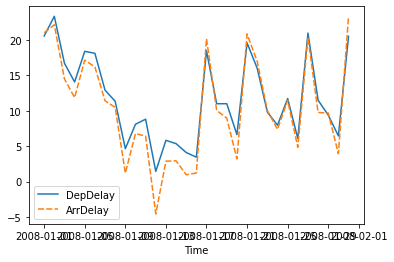

In [ ]:
sns.lineplot(data=data)

In [ ]:
times=[]
for i in df2.index:
  times.append(datetime.datetime(year=2008,month=df2.loc[i,"Month"],day=df2.loc[i,"DayofMonth"]))
df2["Time"]=times  

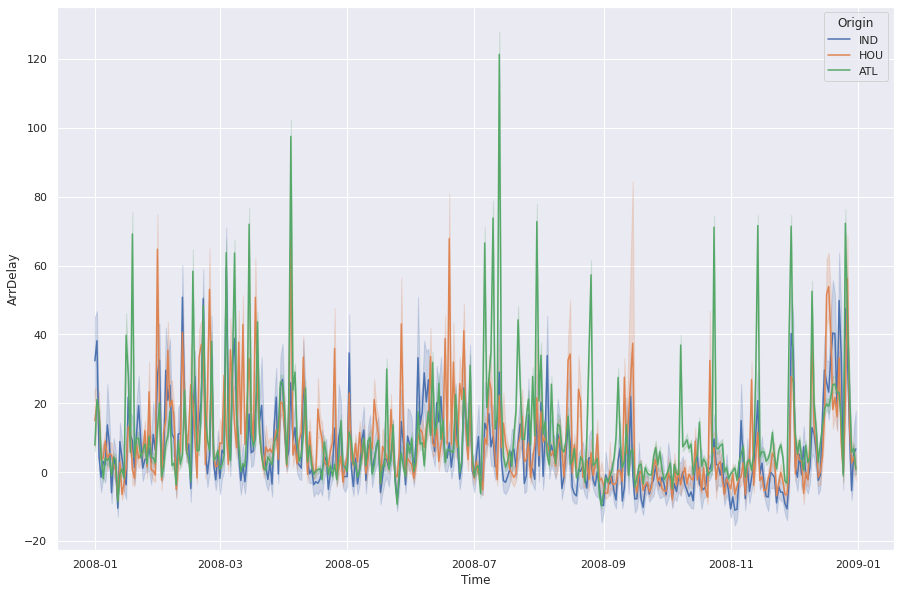

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Time",y="ArrDelay",hue="Origin",data=df2)

##Histogramas y box plots en Matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv')

In [ ]:
df.dropna(inplace=True,subset=["ArrDelay","DepDelay","Distance"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


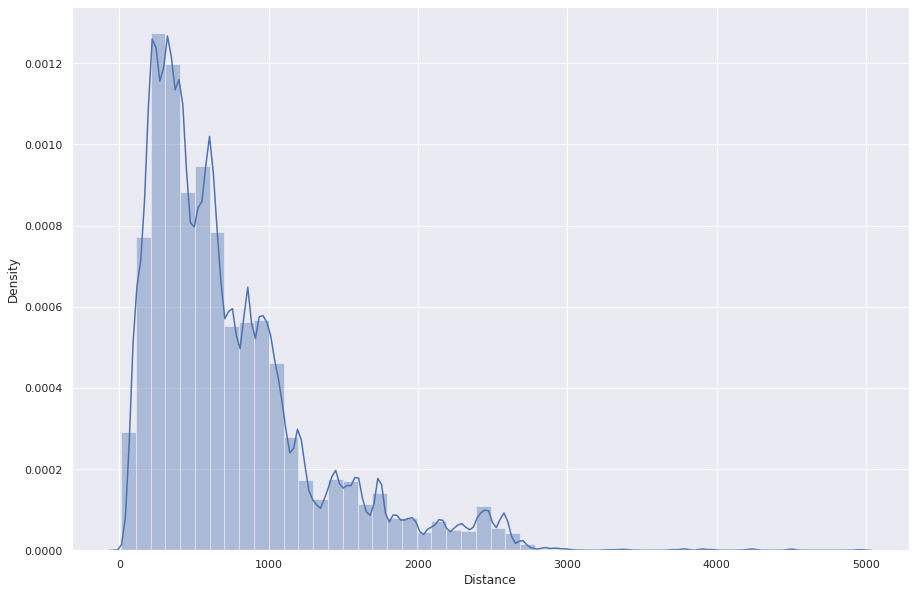

In [ ]:
sns.distplot(df["Distance"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


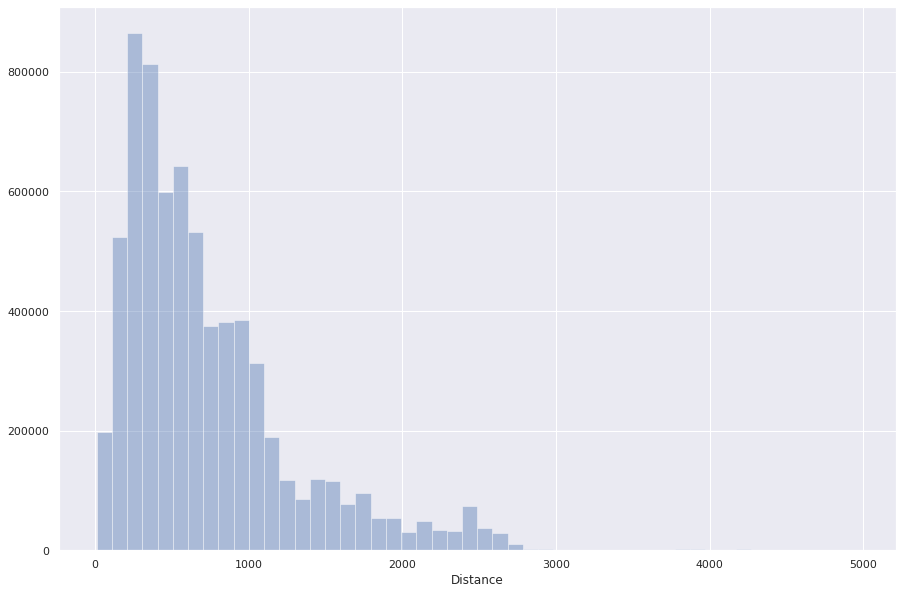

In [ ]:
sns.distplot(df["Distance"],kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


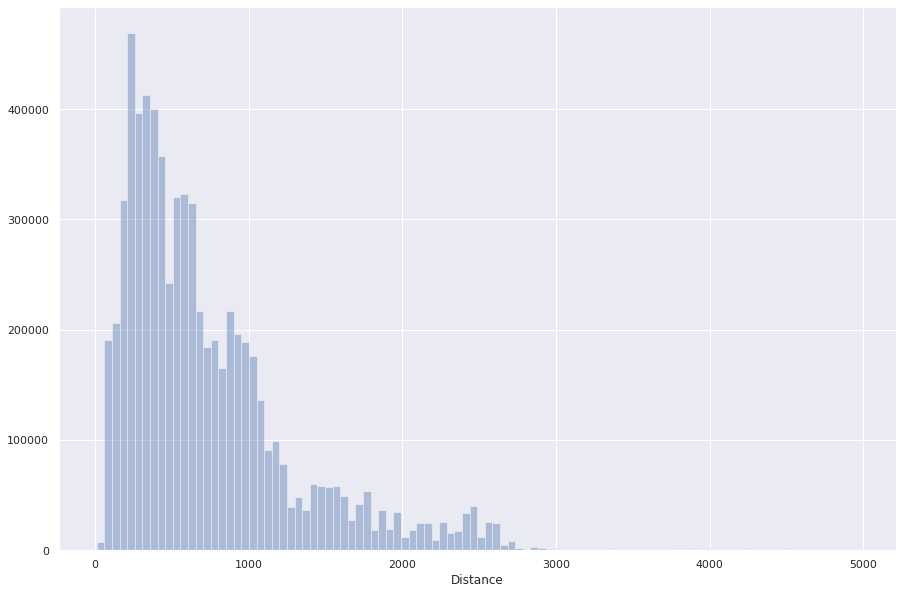

In [ ]:
sns.distplot(df["Distance"],kde=False,bins=100)

(-300.0, 300.0)

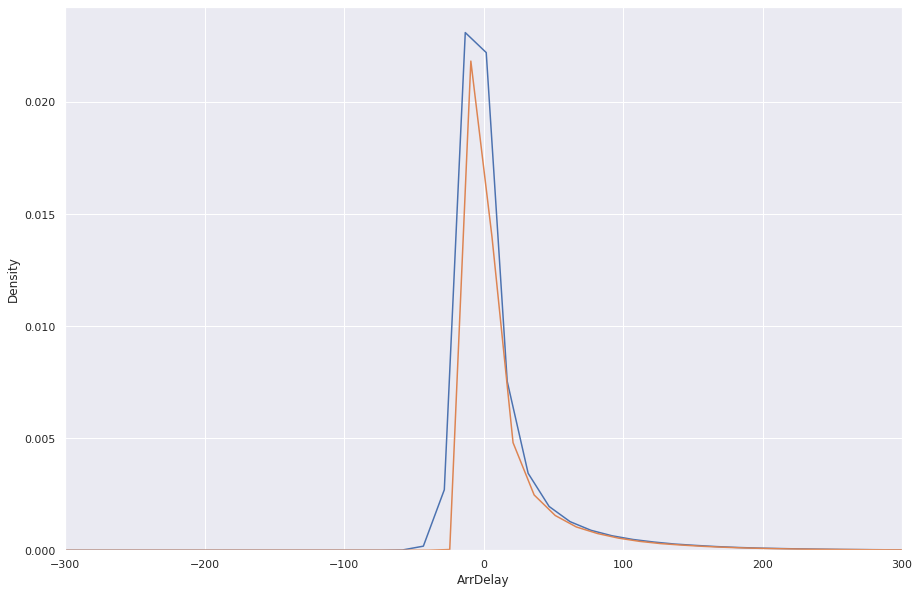

In [ ]:
sns.kdeplot(df["ArrDelay"])
sns.kdeplot(df["DepDelay"])
plt.xlim([-300,300])

In [ ]:
df2=df[df["Origin"].isin(["ATL","HOU","IND"])].sample(frac=1).head(500)

(-20.0, 120.0)

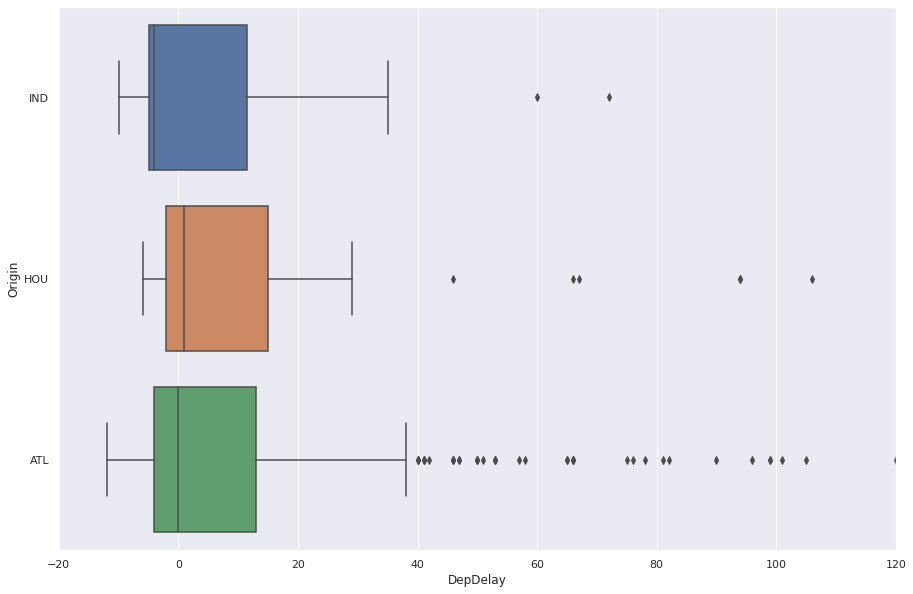

In [ ]:
sns.boxplot(x="DepDelay",y="Origin",data=df2)
plt.xlim([-20,120])

##Nubes de puntos y mapas de calor en Matplolib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv')

In [ ]:
df.dropna(inplace=True,subset=["ArrDelay","DepDelay","Distance","AirTime"])

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


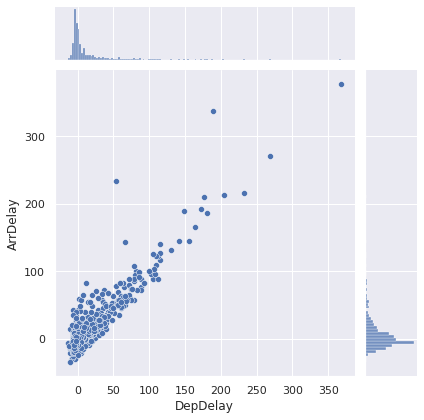

In [ ]:
df2=df[df["Origin"].isin(["ATL","HOU","IND"])].sample(frac=1).head(1000)
sns.jointplot(df2["DepDelay"],df2["ArrDelay"])

In [ ]:
df3=df2[np.abs(df2["DepDelay"])<40]
df3=df3[np.abs(df3["ArrDelay"])<40]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


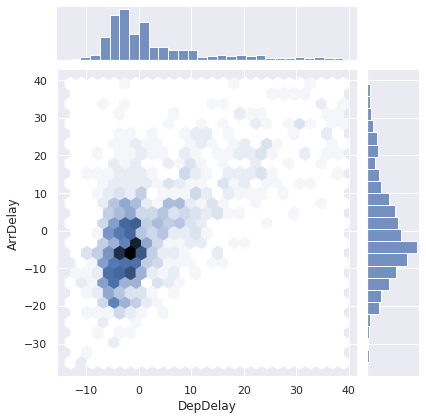

In [ ]:
sns.jointplot(df3["DepDelay"],df3["ArrDelay"],kind="hex")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


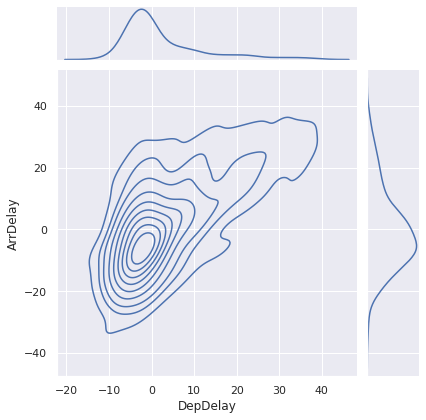

In [ ]:
sns.jointplot(df3["DepDelay"],df3["ArrDelay"],kind="kde")

In [ ]:
#Mapas de calor
gb_df=pd.DataFrame(df2.groupby(["Origin","Month"],as_index=False)["DepDelay"].mean())
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,9.941176
1,ATL,2,17.776119
2,ATL,3,18.080460
3,ATL,4,13.015152
4,ATL,5,8.206349


In [ ]:
data=gb_df.pivot("Month","Origin","DepDelay")
data

Origin,ATL,HOU,IND
Month,,,
1,9.941176,0.666667,13.200000
2,17.776119,10.666667,30.857143
3,18.080460,19.571429,21.000000
4,13.015152,8.857143,-3.000000
5,8.206349,11.888889,-3.500000
6,6.861111,17.230769,5.000000
7,20.960526,13.111111,-7.500000
8,10.145455,7.100000,9.666667
9,2.716216,1.750000,16.666667


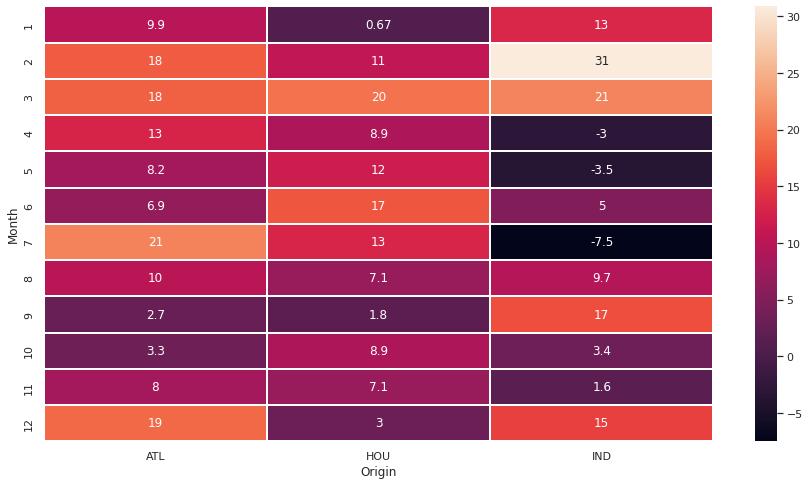

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(data=data,annot=True,linewidths=1)

#Machine Learning esencial: clustering y modelización


##Preparación de datos Machine Learning

In [ ]:
from sklearn import preprocessing
import pandas as pd
import numpy as np


In [ ]:
df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv')

In [ ]:
df=df[["ArrDelay","DepDelay","Distance","AirTime"]].dropna()

In [ ]:
x_scaled=preprocessing.scale(df)

In [ ]:
x_scaled.mean(axis=0)

array([-1.16422790e-17,  5.88747727e-18,  4.64696093e-17, -1.00501725e-16])

In [ ]:
x_scaled.std(axis=0)

array([1., 1., 1., 1.])

In [ ]:
df.iloc[2]

ArrDelay     14.0
DepDelay      8.0
Distance    515.0
AirTime      76.0
Name: 2, dtype: float64

In [ ]:
x_scaled[2]

array([ 0.15146116, -0.05464869, -0.37948664, -0.41546079])

In [ ]:
#Otro tipo de escalado
min_max_scaler=preprocessing.MinMaxScaler([0,10])
X_train_minmax=min_max_scaler.fit_transform(df)
X_train_minmax 

array([[1.69463087, 1.80606465, 1.61381539, 0.85925926],
       [1.74832215, 1.84271909, 1.61381539, 0.83703704],
       [1.7885906 , 1.80606465, 1.01797617, 0.56296296],
       ...,
       [1.74161074, 1.76274575, 1.07856999, 0.62962963],
       [1.77181208, 1.81606131, 1.05433246, 0.65925926],
       [1.72483221, 1.80273242, 1.74308221, 0.77037037]])

In [ ]:
#Valriables categoricas a dummy
df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv')
pd.get_dummies(df["Origin"])


,ABE,ABI,ABQ,ABY,ACK,ACT,ACV,ACY,ADK,ADQ,AEX,AGS,AKN,ALB,ALO,AMA,ANC,ASE,ATL,ATW,AUS,AVL,AVP,AZO,BDL,BET,BFL,BGM,BGR,BHM,BIL,BIS,BJI,BLI,BMI,BNA,BOI,BOS,BPT,BQK,...,SIT,SJC,SJT,SJU,SLC,SLE,SMF,SMX,SNA,SPI,SPS,SRQ,STL,STT,STX,SUN,SUX,SWF,SYR,TEX,TLH,TOL,TPA,TRI,TUL,TUP,TUS,TVC,TWF,TXK,TYR,TYS,VLD,VPS,WRG,WYS,XNA,YAK,YKM,YUM
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009723,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7009724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7009725,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7009726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##K-Means, el algoritmo de clustering


import pandas as pd
import numpy as np
from sklearn.cluster

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv',nrows=1e5)

In [ ]:
newdf=df[["AirTime","Distance","TaxiOut","ArrDelay","DepDelay"]].dropna()

In [ ]:
newdf

,AirTime,Distance,TaxiOut,ArrDelay,DepDelay
0,116.0,810,8.0,-14.0,8.0
1,113.0,810,10.0,2.0,19.0
2,76.0,515,17.0,14.0,8.0
3,78.0,515,7.0,-6.0,-4.0
4,77.0,515,10.0,34.0,34.0
...,...,...,...,...,...
7009723,71.0,533,45.0,14.0,3.0
7009724,139.0,874,23.0,-2.0,-1.0
7009725,85.0,545,12.0,0.0,-5.0
7009726,89.0,533,13.0,9.0,11.0


In [ ]:
kmeans=KMeans(n_clusters=4, random_state=0,n_jobs=-1).fit(newdf)
kmeans.labels_

array([0, 0, 2, ..., 2, 2, 0], dtype=int32)

In [ ]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([2351421,  792862, 3351121,  359625]))

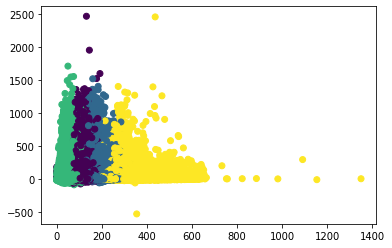

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(newdf["AirTime"],newdf["DepDelay"],c=kmeans.labels_)

In [ ]:
kmeans.cluster_centers_

array([[ 114.86625063,  808.66518776,   16.94198683,    8.75870993,
          10.75694017],
       [ 191.3780052 , 1467.60388865,   17.01894219,    8.47496997,
          11.27129611],
       [  55.26985268,  321.66835051,   15.57133872,    7.71699539,
           8.88706718],
       [ 294.44948515, 2368.02416828,   20.04436143,    7.83647013,
          11.15890332]])

In [ ]:
alldf=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv',nrows=1e6)[["AirTime","Distance","TaxiOut","ArrDelay","DepDelay"]].dropna()

In [ ]:
kmeans.predict(alldf)[0:50]

array([0, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2], dtype=int32)

##El algoritmo hierarchical clustering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv',nrows=1e4)

In [ ]:
newdf=df[["AirTime","Distance","TaxiOut","ArrDelay","DepDelay"]].dropna()

In [ ]:
clstr=AgglomerativeClustering(n_clusters=20)
clstr.fit(newdf)

#euclidean /L1 / L2 / manhattan / cosine /precomputed
#affinity = "L1", linkage="complete"

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=20)

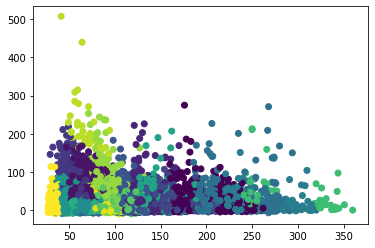

In [ ]:
plt.scatter(newdf["AirTime"],newdf["DepDelay"],c = clstr.fit_predict(newdf))
plt.show()

In [ ]:
newdf=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv',nrows=2e4)[["AirTime","Distance","TaxiOut","ArrDelay","DepDelay"]].dropna()

In [ ]:
clstr.fit_predict(newdf)[0:10]

array([19, 19, 16,  4, 16, 12, 18, 18, 16, 16])

#Machine Learning esencial. Modelización

#Trabajar con PySpark

##Sintaxis Inicial


In [ ]:
from pyspark import SparkConf, SparkContext
conf=SparkConf().setMaster("local").setAppName("Programa")
sc=SparkContext(conf=conf)

ValueError: ignored

In [ ]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [ ]:
lines=sc.textFile("/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv")

In [ ]:
lines

/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv MapPartitionsRDD[80] at textFile at NativeMethodAccessorImpl.java:0

In [ ]:
lines.count()

7009729

In [ ]:
lines.getNumPartitions()

21

In [ ]:
type(lines)

pyspark.rdd.RDD

In [ ]:
lines.first()

'Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay'

In [ ]:
lines.take(5)

['Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay',
 '2008,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128,150,116,-14,8,IAD,TPA,810,4,8,0,,0,NA,NA,NA,NA,NA',
 '2008,1,3,4,754,735,1002,1000,WN,3231,N772SW,128,145,113,2,19,IAD,TPA,810,5,10,0,,0,NA,NA,NA,NA,NA',
 '2008,1,3,4,628,620,804,750,WN,448,N428WN,96,90,76,14,8,IND,BWI,515,3,17,0,,0,NA,NA,NA,NA,NA',
 '2008,1,3,4,926,930,1054,1100,WN,1746,N612SW,88,90,78,-6,-4,IND,BWI,515,3,7,0,,0,NA,NA,NA,NA,NA']

In [ ]:
lines2=lines.sample(fraction=0.1,withReplacement=False)#fracción del dataset y reemplazo

In [ ]:
lines2.first()

'2008,1,3,4,2003,1955,2211,2225,WN,335,N712SW,128,150,116,-14,8,IAD,TPA,810,4,8,0,,0,NA,NA,NA,NA,NA'

In [ ]:
lines2.count()

700607

##Funcioens lambda

In [ ]:
lines.first()

'Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay'

In [ ]:
resultado=lines.filter(lambda line:"LAS" in line)

In [ ]:
resultado.count()

345747

In [ ]:
resultado.take(10)

['2008,1,3,4,1937,1830,2037,1940,WN,509,N763SW,240,250,230,57,67,IND,LAS,1591,3,7,0,,0,10,0,0,0,47',
 '2008,1,3,4,1039,1040,1132,1150,WN,535,N428WN,233,250,219,-18,-1,IND,LAS,1591,7,7,0,,0,NA,NA,NA,NA,NA',
 '2008,1,3,4,734,730,958,1020,WN,550,N712SW,324,350,314,-22,4,ISP,LAS,2283,2,8,0,,0,NA,NA,NA,NA,NA',
 '2008,1,3,4,1538,1445,1753,1710,WN,500,N799SW,75,85,60,43,53,LAS,ABQ,487,4,11,0,,0,15,0,0,0,28',
 '2008,1,3,4,933,935,1151,1200,WN,778,N607SW,78,85,63,-9,-2,LAS,ABQ,487,5,10,0,,0,NA,NA,NA,NA,NA',
 '2008,1,3,4,2248,2125,102,2345,WN,890,N618WN,74,80,60,77,83,LAS,ABQ,487,4,10,0,,0,7,0,0,0,70',
 '2008,1,3,4,1327,1230,1550,1500,WN,1171,N682SW,83,90,65,50,57,LAS,ABQ,487,3,15,0,,0,50,0,0,0,0',
 '2008,1,3,4,624,625,846,850,WN,1320,N456WN,82,85,61,-4,-1,LAS,ABQ,487,4,17,0,,0,NA,NA,NA,NA,NA',
 '2008,1,3,4,1614,1600,1833,1825,WN,1925,N509SW,79,85,60,8,14,LAS,ABQ,487,4,15,0,,0,NA,NA,NA,NA,NA',
 '2008,1,3,4,1917,1915,2136,2140,WN,2457,N293,79,85,60,-4,2,LAS,ABQ,487,5,14,0,,0,NA,NA,NA,NA,NA']

In [ ]:
#lines.filter(lambda x: any(i.isdigit() for i in x)).count()

In [ ]:
#numeros=lines.filter(lambda x: any(i.isdigit() for i in x))

In [ ]:
#numeros.persist()

PythonRDD[13] at RDD at PythonRDD.scala:53

In [ ]:
#numeros.count()

7009728

##Dataframes en PySpark

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv', nrows = 5000000)
#df=5

In [ ]:
df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [ ]:
from pyspark.sql.types import StringType
from pyspark import SQLContext
sqlContext=SQLContext(sc)



/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
dfspark=sqlContext.read.format("csv").option("header","true").option("inferSchema","true").load("/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv")

In [ ]:
dfspark.show(10)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2008|    1|         3|        4|   2003|      1955|   2211|      2225|           WN|      335

In [ ]:
dfspark.head(2)

[Row(Year=2008, Month=1, DayofMonth=3, DayOfWeek=4, DepTime='2003', CRSDepTime=1955, ArrTime='2211', CRSArrTime=2225, UniqueCarrier='WN', FlightNum=335, TailNum='N712SW', ActualElapsedTime='128', CRSElapsedTime='150', AirTime='116', ArrDelay='-14', DepDelay='8', Origin='IAD', Dest='TPA', Distance=810, TaxiIn='4', TaxiOut='8', Cancelled=0, CancellationCode=None, Diverted=0, CarrierDelay='NA', WeatherDelay='NA', NASDelay='NA', SecurityDelay='NA', LateAircraftDelay='NA'),
 Row(Year=2008, Month=1, DayofMonth=3, DayOfWeek=4, DepTime='754', CRSDepTime=735, ArrTime='1002', CRSArrTime=1000, UniqueCarrier='WN', FlightNum=3231, TailNum='N772SW', ActualElapsedTime='128', CRSElapsedTime='145', AirTime='113', ArrDelay='2', DepDelay='19', Origin='IAD', Dest='TPA', Distance=810, TaxiIn='5', TaxiOut='10', Cancelled=0, CancellationCode=None, Diverted=0, CarrierDelay='NA', WeatherDelay='NA', NASDelay='NA', SecurityDelay='NA', LateAircraftDelay='NA')]

In [ ]:
dfspark.count()

7009728

In [ ]:
type(dfspark)

pyspark.sql.dataframe.DataFrame

In [ ]:
dfspark=dfspark.sample(0.1,False)

In [ ]:
dfspark.count()

701187

In [ ]:
dfspark.persist()

DataFrame[Year: int, Month: int, DayofMonth: int, DayOfWeek: int, DepTime: string, CRSDepTime: int, ArrTime: string, CRSArrTime: int, UniqueCarrier: string, FlightNum: int, TailNum: string, ActualElapsedTime: string, CRSElapsedTime: string, AirTime: string, ArrDelay: string, DepDelay: string, Origin: string, Dest: string, Distance: int, TaxiIn: string, TaxiOut: string, Cancelled: int, CancellationCode: string, Diverted: int, CarrierDelay: string, WeatherDelay: string, NASDelay: string, SecurityDelay: string, LateAircraftDelay: string]

In [ ]:
dfspark.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: string (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)
 |-- Car

In [ ]:
dfspark.show(10)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2008|    1|         3|        4|    628|       620|    804|       750|           WN|      448

In [ ]:
dfspark=dfspark.withColumn("ArrDelay",dfspark["ArrDelay"].cast("integer"))

In [ ]:
dfspark.show(20)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2008|    1|         3|        4|    628|       620|    804|       750|           WN|      448

In [ ]:
dfspark.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: integer (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)
 |-- Ca

In [ ]:
df2=dfspark.na.drop(subset=["ArrDelay","DepDelay","Distance"])

In [ ]:
df2.show(10)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2008|    1|         3|        4|    628|       620|    804|       750|           WN|      448

In [ ]:
df2.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: integer (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)
 |-- Ca

In [ ]:
df2=df2.filter("ArrDelay is not NULL")

In [ ]:
df2.count()

685945

In [ ]:
df2.show(10)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2008|    1|         3|        4|    628|       620|    804|       750|           WN|      448

In [ ]:
df2.printSchema()

root
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: integer (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: integer (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: integer (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: integer (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: integer (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: integer (nullable = true)
 |-- Ca

In [ ]:
import numpy as np
media = np.mean(df2.select("ArrDelay").collect())

In [ ]:
media

8.510718973311944

In [ ]:
df2.rdd.getNumPartitions()

6

##Transformaciones básicas

In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql.types import StringType
from pyspark import SQLContext
import numpy as np

In [ ]:
conf = SparkConf().setMaster("local").setAppName("Programa")
sc=SparkContext(conf=conf)
sqlContext=SQLContext(sc)

ValueError: ignored

In [ ]:
dfspark=sqlContext.read.format("csv").option("header","true").option("inferSchema","true").load("/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv")
dfspark=dfspark.sample(0.001,False)
dfspark=dfspark.withColumn("ArrDelay",dfspark["ArrDelay"].cast("integer"))

In [ ]:
df2=dfspark.na.drop(subset=['ArrDelay','DepDelay','Distance'])
df2=df2.filter("Arrdelay is not NULL")
df2=df2.dropDuplicates()

In [ ]:
df2.select("ArrDelay").filter("ArrDelay > 60").take(100)

[Row(ArrDelay=67),
 Row(ArrDelay=64),
 Row(ArrDelay=65),
 Row(ArrDelay=215),
 Row(ArrDelay=192),
 Row(ArrDelay=116),
 Row(ArrDelay=139),
 Row(ArrDelay=66),
 Row(ArrDelay=117),
 Row(ArrDelay=69),
 Row(ArrDelay=121),
 Row(ArrDelay=72),
 Row(ArrDelay=131),
 Row(ArrDelay=106),
 Row(ArrDelay=110),
 Row(ArrDelay=88),
 Row(ArrDelay=125),
 Row(ArrDelay=270),
 Row(ArrDelay=168),
 Row(ArrDelay=239),
 Row(ArrDelay=159),
 Row(ArrDelay=66),
 Row(ArrDelay=62),
 Row(ArrDelay=86),
 Row(ArrDelay=84),
 Row(ArrDelay=75),
 Row(ArrDelay=85),
 Row(ArrDelay=139),
 Row(ArrDelay=140),
 Row(ArrDelay=78),
 Row(ArrDelay=161),
 Row(ArrDelay=414),
 Row(ArrDelay=100),
 Row(ArrDelay=118),
 Row(ArrDelay=94),
 Row(ArrDelay=61),
 Row(ArrDelay=79),
 Row(ArrDelay=79),
 Row(ArrDelay=92),
 Row(ArrDelay=123),
 Row(ArrDelay=118),
 Row(ArrDelay=197),
 Row(ArrDelay=110),
 Row(ArrDelay=162),
 Row(ArrDelay=112),
 Row(ArrDelay=61),
 Row(ArrDelay=172),
 Row(ArrDelay=64),
 Row(ArrDelay=149),
 Row(ArrDelay=93),
 Row(ArrDelay=128),
 R

In [ ]:
df2.filter("ArrDelay > 60").take(5)

[Row(Year=2008, Month=2, DayofMonth=21, DayOfWeek=4, DepTime='2342', CRSDepTime=2250, ArrTime='102', CRSArrTime=2355, UniqueCarrier='FL', FlightNum=331, TailNum='N950AT', ActualElapsedTime='140', CRSElapsedTime='125', AirTime='117', ArrDelay=67, DepDelay='52', Origin='ATL', Dest='HOU', Distance=696, TaxiIn='5', TaxiOut='18', Cancelled=0, CancellationCode=None, Diverted=0, CarrierDelay='0', WeatherDelay='0', NASDelay='15', SecurityDelay='0', LateAircraftDelay='52'),
 Row(Year=2008, Month=1, DayofMonth=24, DayOfWeek=4, DepTime='1522', CRSDepTime=1440, ArrTime='1709', CRSArrTime=1605, UniqueCarrier='MQ', FlightNum=3166, TailNum='N848AE', ActualElapsedTime='107', CRSElapsedTime='85', AirTime='76', ArrDelay=64, DepDelay='42', Origin='SNA', Dest='SFO', Distance=372, TaxiIn='7', TaxiOut='24', Cancelled=0, CancellationCode=None, Diverted=0, CarrierDelay='0', WeatherDelay='0', NASDelay='64', SecurityDelay='0', LateAircraftDelay='0'),
 Row(Year=2008, Month=2, DayofMonth=17, DayOfWeek=7, DepTime=

In [ ]:
type(df2)

pyspark.sql.dataframe.DataFrame

In [ ]:
media = np.mean(df2.select('ArrDelay').collect())
df2.select("ArrDelay").rdd.map(lambda x: (x -media)**2).take(10)

[array([341.85351288]),
 array([1405.4461919]),
 array([462.71103075]),
 array([341.85351288]),
 array([0.23939592]),
 array([30.13220619]),
 array([42.11076824]),
 array([30.13220619]),
 array([506.7324687]),
 array([132.49665128])]

In [ ]:
df2.groupBy("DayOfWeek").count().show()

+---------+-----+
|DayOfWeek|count|
+---------+-----+
|        1| 1004|
|        6|  806|
|        3| 1040|
|        5| 1009|
|        4| 1024|
|        7|  993|
|        2|  981|
+---------+-----+



In [ ]:
df2.groupBy("DayOfWeek").mean("ArrDelay").show()

+---------+-----------------+
|DayOfWeek|    avg(ArrDelay)|
+---------+-----------------+
|        1|9.208167330677291|
|        6|4.884615384615385|
|        3|7.038461538461538|
|        5|12.13181367690783|
|        4|    10.1357421875|
|        7|8.255790533736153|
|        2|7.174311926605505|
+---------+-----------------+



In [ ]:
df2.select("Origin").rdd.distinct().take(5)

[Row(Origin='PIT'),
 Row(Origin='FSM'),
 Row(Origin='SMF'),
 Row(Origin='SPI'),
 Row(Origin='CWA')]

In [ ]:
df2.select("Origin").rdd.distinct().count()

245

In [ ]:
df2.orderBy(df2.ArrDelay.desc()).take(5)

[Row(Year=2008, Month=4, DayofMonth=6, DayOfWeek=7, DepTime='1816', CRSDepTime=835, ArrTime='2035', CRSArrTime=1047, UniqueCarrier='9E', FlightNum=3711, TailNum='83909E', ActualElapsedTime='139', CRSElapsedTime='132', AirTime='83', ArrDelay=588, DepDelay='581', Origin='CAE', Dest='DTW', Distance=583, TaxiIn='16', TaxiOut='40', Cancelled=0, CancellationCode=None, Diverted=0, CarrierDelay='581', WeatherDelay='0', NASDelay='7', SecurityDelay='0', LateAircraftDelay='0'),
 Row(Year=2008, Month=1, DayofMonth=2, DayOfWeek=3, DepTime='1949', CRSDepTime=1320, ArrTime='2203', CRSArrTime=1509, UniqueCarrier='XE', FlightNum=2790, TailNum='N16919', ActualElapsedTime='134', CRSElapsedTime='109', AirTime='75', ArrDelay=414, DepDelay='389', Origin='RDU', Dest='EWR', Distance=416, TaxiIn='9', TaxiOut='50', Cancelled=0, CancellationCode=None, Diverted=0, CarrierDelay='0', WeatherDelay='0', NASDelay='43', SecurityDelay='0', LateAircraftDelay='371'),
 Row(Year=2008, Month=3, DayofMonth=8, DayOfWeek=6, Dep

##Acciones básicas en PySaprk

In [ ]:
dfspark=sqlContext.read.format("csv").option("header","true").option("inferSchema","true").load("/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv")
dfspark=dfspark.sample(0.001,False)
dfspark=dfspark.withColumn("ArrDelay",dfspark["ArrDelay"].cast("integer"))

In [ ]:
df2=dfspark.na.drop(subset=['ArrDelay','DepDelay','Distance'])
df2=df2.filter("Arrdelay is not NULL")
df2=df2.dropDuplicates()

In [ ]:
df2.select("ArrDelay").describe().show()

+-------+------------------+
|summary|          ArrDelay|
+-------+------------------+
|  count|              6857|
|   mean| 8.510718973311944|
| stddev|38.030635915127974|
|    min|               -44|
|    max|               588|
+-------+------------------+



In [ ]:
df2.select("Origin").rdd.countByValue()

defaultdict(int,
            {Row(Origin='ABE'): 1,
             Row(Origin='ABI'): 1,
             Row(Origin='ABQ'): 41,
             Row(Origin='ACV'): 2,
             Row(Origin='ADK'): 1,
             Row(Origin='ADQ'): 1,
             Row(Origin='AEX'): 2,
             Row(Origin='AGS'): 2,
             Row(Origin='AKN'): 1,
             Row(Origin='ALB'): 9,
             Row(Origin='AMA'): 3,
             Row(Origin='ANC'): 15,
             Row(Origin='ASE'): 3,
             Row(Origin='ATL'): 426,
             Row(Origin='ATW'): 5,
             Row(Origin='AUS'): 44,
             Row(Origin='AVL'): 5,
             Row(Origin='AZO'): 2,
             Row(Origin='BDL'): 29,
             Row(Origin='BFL'): 2,
             Row(Origin='BGR'): 4,
             Row(Origin='BHM'): 19,
             Row(Origin='BIL'): 4,
             Row(Origin='BIS'): 1,
             Row(Origin='BMI'): 6,
             Row(Origin='BNA'): 53,
             Row(Origin='BOI'): 12,
             Row(Origin='BOS'

In [ ]:
df2.select("Origin").rdd.collect()

[Row(Origin='MDW'),
 Row(Origin='SEA'),
 Row(Origin='JFK'),
 Row(Origin='PHL'),
 Row(Origin='BOS'),
 Row(Origin='MIA'),
 Row(Origin='SLC'),
 Row(Origin='DAY'),
 Row(Origin='DEN'),
 Row(Origin='DTW'),
 Row(Origin='OKC'),
 Row(Origin='IAH'),
 Row(Origin='DCA'),
 Row(Origin='ORD'),
 Row(Origin='DTW'),
 Row(Origin='DAL'),
 Row(Origin='ORD'),
 Row(Origin='LAS'),
 Row(Origin='TPA'),
 Row(Origin='SAV'),
 Row(Origin='CMH'),
 Row(Origin='BWI'),
 Row(Origin='DFW'),
 Row(Origin='IAD'),
 Row(Origin='IAH'),
 Row(Origin='DFW'),
 Row(Origin='SAN'),
 Row(Origin='CVG'),
 Row(Origin='DCA'),
 Row(Origin='SMF'),
 Row(Origin='CLE'),
 Row(Origin='SGU'),
 Row(Origin='DTW'),
 Row(Origin='ATL'),
 Row(Origin='MIA'),
 Row(Origin='KTN'),
 Row(Origin='IAH'),
 Row(Origin='OAK'),
 Row(Origin='ATL'),
 Row(Origin='ORD'),
 Row(Origin='MIA'),
 Row(Origin='DFW'),
 Row(Origin='ATL'),
 Row(Origin='TUL'),
 Row(Origin='ABQ'),
 Row(Origin='PHX'),
 Row(Origin='ATL'),
 Row(Origin='DFW'),
 Row(Origin='DFW'),
 Row(Origin='MCO'),


In [ ]:
df2.select("ArrDelay").rdd.max()

Row(ArrDelay=588)

In [ ]:
df2.select("ArrDelay").rdd.max()[0]

588

In [ ]:
df2.crosstab("DayOfWeek","Origin").take(2)

[Row(DayOfWeek_Origin='5', ABE=0, ABI=0, ABQ=2, ACV=0, ADK=0, ADQ=0, AEX=0, AGS=0, AKN=0, ALB=2, AMA=0, ANC=2, ASE=1, ATL=66, ATW=2, AUS=7, AVL=2, AZO=0, BDL=3, BFL=0, BGR=1, BHM=3, BIL=2, BIS=0, BMI=1, BNA=7, BOI=1, BOS=15, BTM=0, BTR=0, BTV=1, BUF=2, BUR=7, BWI=12, BZN=2, CAE=2, CAK=1, CDV=1, CEC=0, CHA=0, CHS=2, CIC=0, CID=0, CLD=0, CLE=17, CLL=0, CLT=19, CMH=3, CMI=0, COD=0, COS=1, CPR=0, CRP=3, CRW=0, CVG=12, CWA=0, DAB=0, DAL=8, DAY=3, DBQ=1, DCA=14, DEN=28, DFW=41, DLH=1, DRO=2, DSM=0, DTW=19, EGE=1, EKO=0, ELM=0, ELP=2, ERI=0, EUG=3, EVV=1, EWN=1, EWR=15, EYW=0, FAI=0, FAR=2, FAT=2, FLG=0, FLL=9, FNT=0, FSD=0, FSM=1, FWA=0, GEG=3, GFK=1, GGG=1, GJT=2, GNV=0, GPT=2, GRB=3, GRK=2, GRR=1, GSO=1, GSP=2, GTF=0, GTR=0, HDN=0, HHH=1, HLN=0, HNL=5, HOU=7, HPN=4, HRL=0, HSV=2, IAD=10, IAH=32, ICT=3, IDA=0, ILM=0, IND=6, IPL=0, ISP=0, ITO=2, IYK=0, JAC=0, JAN=2, JAX=4, JFK=17, JNU=0, KOA=2, KTN=1, LAN=0, LAS=24, LAW=0, LAX=33, LBB=0, LEX=2, LFT=1, LGA=18, LGB=3, LIH=2, LIT=1, LNK=0, LRD=

##Operaciones numéricas con RDD


In [ ]:
lista=sc.parallelize(range(1,1000000))
lista.reduce(lambda x,y:x+y)

499999500000

In [ ]:
lista.sum()

499999500000

In [ ]:
from pyspark.sql.functions import mean, stddev, col
media=df2.select(mean(col('ArrDelay'))).collect()
std=df2.select(stddev(col('ArrDelay'))).collect()

In [ ]:
 std

[Row(stddev_samp(ArrDelay)=38.030635915127974)]

In [ ]:
std[0][0]

38.030635915127974

In [ ]:
df2.withColumn('Diferencia', df2['ArrDelay']-df2['DepDelay']).collect()

[Row(Year=2008, Month=1, DayofMonth=14, DayOfWeek=1, DepTime='1307', CRSDepTime=1240, ArrTime='1432', CRSArrTime=1405, UniqueCarrier='WN', FlightNum=1577, TailNum='N486WN', ActualElapsedTime='85', CRSElapsedTime='85', AirTime='70', ArrDelay=27, DepDelay='27', Origin='MDW', Dest='MCI', Distance=405, TaxiIn='6', TaxiOut='9', Cancelled=0, CancellationCode=None, Diverted=0, CarrierDelay='27', WeatherDelay='0', NASDelay='0', SecurityDelay='0', LateAircraftDelay='0', Diferencia=0.0),
 Row(Year=2008, Month=3, DayofMonth=26, DayOfWeek=3, DepTime='2105', CRSDepTime=2040, ArrTime='2359', CRSArrTime=2313, UniqueCarrier='AS', FlightNum=85, TailNum='N306AS', ActualElapsedTime='234', CRSElapsedTime='213', AirTime='186', ArrDelay=46, DepDelay='25', Origin='SEA', Dest='ANC', Distance=1449, TaxiIn='6', TaxiOut='42', Cancelled=0, CancellationCode=None, Diverted=0, CarrierDelay='0', WeatherDelay='0', NASDelay='21', SecurityDelay='0', LateAircraftDelay='25', Diferencia=21.0),
 Row(Year=2008, Month=3, Dayo

In [ ]:
df2.withColumn('Standard',(df2['ArrDelay']-media[0][0])/std[0][0]).collect()

[Row(Year=2008, Month=1, DayofMonth=14, DayOfWeek=1, DepTime='1307', CRSDepTime=1240, ArrTime='1432', CRSArrTime=1405, UniqueCarrier='WN', FlightNum=1577, TailNum='N486WN', ActualElapsedTime='85', CRSElapsedTime='85', AirTime='70', ArrDelay=27, DepDelay='27', Origin='MDW', Dest='MCI', Distance=405, TaxiIn='6', TaxiOut='9', Cancelled=0, CancellationCode=None, Diverted=0, CarrierDelay='27', WeatherDelay='0', NASDelay='0', SecurityDelay='0', LateAircraftDelay='0', Standard=0.4861680742849035),
 Row(Year=2008, Month=3, DayofMonth=26, DayOfWeek=3, DepTime='2105', CRSDepTime=2040, ArrTime='2359', CRSArrTime=2313, UniqueCarrier='AS', FlightNum=85, TailNum='N306AS', ActualElapsedTime='234', CRSElapsedTime='213', AirTime='186', ArrDelay=46, DepDelay='25', Origin='SEA', Dest='ANC', Distance=1449, TaxiIn='6', TaxiOut='42', Cancelled=0, CancellationCode=None, Diverted=0, CarrierDelay='0', WeatherDelay='0', NASDelay='21', SecurityDelay='0', LateAircraftDelay='25', Standard=0.9857652948625932),
 Row

#PySpark Avanzado

## Joins en Pyspark

In [ ]:
from pyspark import SparkConf, SparkContext
conf=SparkConf().setMaster("local").setAppName("Programa")
sc=SparkContext(conf=conf)

ValueError: ignored

In [ ]:
x = sc.parallelize([("a",5),("b",6),("c",7),("d",8)])
y = sc.parallelize([("a",1),("a",2),("c",3)])

In [ ]:
x.join(y).collect()

[('c', (7, 3)), ('a', (5, 1)), ('a', (5, 2))]

In [ ]:
y.join(x).collect()

[('c', (3, 7)), ('a', (1, 5)), ('a', (2, 5))]

In [ ]:
y.leftOuterJoin(x).collect()

[('c', (3, 7)), ('a', (1, 5)), ('a', (2, 5))]

In [ ]:
x.leftOuterJoin(y).collect()

[('b', (6, None)),
 ('c', (7, 3)),
 ('d', (8, None)),
 ('a', (5, 1)),
 ('a', (5, 2))]

In [ ]:
y.rightOuterJoin(x).collect()

[('c', (3, 7)),
 ('b', (None, 6)),
 ('d', (None, 8)),
 ('a', (1, 5)),
 ('a', (2, 5))]

## Acumuladores. Cómo detectar patrones en nuestros datos


In [ ]:
from pyspark import SparkConf, SparkContext
conf=SparkConf().setMaster("local").setAppName("Programa")
sc=SparkContext(conf=conf)

In [ ]:
lines=sc.textFile("/content/drive/My Drive/Archivos_Spark/BaseDatos.csv")

In [ ]:
lines.take(9)

['Estrato,usoBotes4,QHCarton7,QHVidrio7,QHPET7,QHHDPE7,QHUnicel7,QHTetrapack7,QhAluminio7,QhLatas7,QHMetales7,QHJuguetes7,QHLlantas7,QHPapel7,QHBolsaPlastico7,QHMatConstruc7,QHMuebles7,QHMedicMatCurac7,QHElectronicos7,QHRopaZapato7,QHAceiteAuto7,QHAceiteCocina7,QHPilas7,QHPa�ales7,QHOrganicosHigienicos7,ResponsableRSU11,AlmacenaRes15,FrecSeparacion16,XqNoSepara17,AquienEntrega18,CantidadGenera22,CamionAdecuado24,CooperaPropina26,CuantoCoopera27,ComoConsideraServicio28,DispuestoPagar30,PropuestaRecolecc31,ParticipariaComite35,DispuestoCapacitarse37,NumPersonas',
 'Medio ,Si,Dona,Dona,Dona,Dona,,Dona,Dona,Dona,Dona,Dona,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Ambos,Contenedor /Bote,Otro,,Ayuntamiento,,No,Si,$5 - $10,Bueno,$11 - $15,Tipo de recolecci�n,Si,Si,cuatro',
 'Cabecera,Si,Entrega separado ,Entrega sepa

In [ ]:
py = sc.accumulator(0)
sp = sc.accumulator(0)

In [ ]:

def lenguajes (linea):
  global py, sp
  if "Cabecera" in linea:
    py += 1
    if "No" in linea:
      sp += 1
    return True
  if "No" in linea:
    sp += 1
    return True
  else :
    return False

valores = lines.filter(lenguajes)

In [ ]:
valores.collect()

['Estrato,usoBotes4,QHCarton7,QHVidrio7,QHPET7,QHHDPE7,QHUnicel7,QHTetrapack7,QhAluminio7,QhLatas7,QHMetales7,QHJuguetes7,QHLlantas7,QHPapel7,QHBolsaPlastico7,QHMatConstruc7,QHMuebles7,QHMedicMatCurac7,QHElectronicos7,QHRopaZapato7,QHAceiteAuto7,QHAceiteCocina7,QHPilas7,QHPa�ales7,QHOrganicosHigienicos7,ResponsableRSU11,AlmacenaRes15,FrecSeparacion16,XqNoSepara17,AquienEntrega18,CantidadGenera22,CamionAdecuado24,CooperaPropina26,CuantoCoopera27,ComoConsideraServicio28,DispuestoPagar30,PropuestaRecolecc31,ParticipariaComite35,DispuestoCapacitarse37,NumPersonas',
 'Medio ,Si,Dona,Dona,Dona,Dona,,Dona,Dona,Dona,Dona,Dona,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Entrega Mezclado,Ambos,Contenedor /Bote,Otro,,Ayuntamiento,,No,Si,$5 - $10,Bueno,$11 - $15,Tipo de recolecci�n,Si,Si,cuatro',
 'Cabecera,Si,Entrega separado ,Entrega sepa

In [ ]:
py

Accumulator<id=0, value=102>

In [ ]:
sp

Accumulator<id=1, value=303>

## Construir funciones MAP


In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql.types import StringType
from pyspark import SQLContext



In [ ]:
conf = SparkConf().setMaster("local").setAppName("Curso")
sc = SparkContext(conf = conf)
sqlContext = SQLContext(sc)

In [ ]:
dfspark=sqlContext.read.format("csv").option("header","true").option("inferSchema","true").load("/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv")
dfspark=dfspark.sample(0.001,False)
dfspark=dfspark.withColumn("ArrDelay",dfspark["ArrDelay"].cast("integer"))

In [ ]:
df2= dfspark.na.drop(subset=['ArrDelay','DepDelay','Distance'])
df2 = df2.filter('ArrDelay is not NULL')
df2 = df2.dropDuplicates()

In [ ]:
A = sc.parallelize(df2.select("Origin").rdd.collect()) 

In [ ]:
A.persist()

ParallelCollectionRDD[19] at readRDDFromFile at PythonRDD.scala:262

In [ ]:
mapfunction = A.map(lambda x:(x,1))

In [ ]:
mapfunction.collect()

[(Row(Origin='MDW'), 1),
 (Row(Origin='SEA'), 1),
 (Row(Origin='JFK'), 1),
 (Row(Origin='PHL'), 1),
 (Row(Origin='BOS'), 1),
 (Row(Origin='MIA'), 1),
 (Row(Origin='SLC'), 1),
 (Row(Origin='DAY'), 1),
 (Row(Origin='DEN'), 1),
 (Row(Origin='DTW'), 1),
 (Row(Origin='OKC'), 1),
 (Row(Origin='IAH'), 1),
 (Row(Origin='DCA'), 1),
 (Row(Origin='ORD'), 1),
 (Row(Origin='DTW'), 1),
 (Row(Origin='DAL'), 1),
 (Row(Origin='ORD'), 1),
 (Row(Origin='LAS'), 1),
 (Row(Origin='TPA'), 1),
 (Row(Origin='SAV'), 1),
 (Row(Origin='CMH'), 1),
 (Row(Origin='BWI'), 1),
 (Row(Origin='DFW'), 1),
 (Row(Origin='IAD'), 1),
 (Row(Origin='IAH'), 1),
 (Row(Origin='DFW'), 1),
 (Row(Origin='SAN'), 1),
 (Row(Origin='CVG'), 1),
 (Row(Origin='DCA'), 1),
 (Row(Origin='SMF'), 1),
 (Row(Origin='CLE'), 1),
 (Row(Origin='SGU'), 1),
 (Row(Origin='DTW'), 1),
 (Row(Origin='ATL'), 1),
 (Row(Origin='MIA'), 1),
 (Row(Origin='KTN'), 1),
 (Row(Origin='IAH'), 1),
 (Row(Origin='OAK'), 1),
 (Row(Origin='ATL'), 1),
 (Row(Origin='ORD'), 1),


In [ ]:
def fun(x):
  if x[0] in ["SEA", "ATL", "HOU"]:
    return((x,2))
  elif x[0] == "DEN":
    return((x,3))
  else:
    return((x,1))

In [ ]:
mapfunction = A.map(fun)

In [ ]:
mapfunction.collect()

[(Row(Origin='MDW'), 1),
 (Row(Origin='SEA'), 2),
 (Row(Origin='JFK'), 1),
 (Row(Origin='PHL'), 1),
 (Row(Origin='BOS'), 1),
 (Row(Origin='MIA'), 1),
 (Row(Origin='SLC'), 1),
 (Row(Origin='DAY'), 1),
 (Row(Origin='DEN'), 3),
 (Row(Origin='DTW'), 1),
 (Row(Origin='OKC'), 1),
 (Row(Origin='IAH'), 1),
 (Row(Origin='DCA'), 1),
 (Row(Origin='ORD'), 1),
 (Row(Origin='DTW'), 1),
 (Row(Origin='DAL'), 1),
 (Row(Origin='ORD'), 1),
 (Row(Origin='LAS'), 1),
 (Row(Origin='TPA'), 1),
 (Row(Origin='SAV'), 1),
 (Row(Origin='CMH'), 1),
 (Row(Origin='BWI'), 1),
 (Row(Origin='DFW'), 1),
 (Row(Origin='IAD'), 1),
 (Row(Origin='IAH'), 1),
 (Row(Origin='DFW'), 1),
 (Row(Origin='SAN'), 1),
 (Row(Origin='CVG'), 1),
 (Row(Origin='DCA'), 1),
 (Row(Origin='SMF'), 1),
 (Row(Origin='CLE'), 1),
 (Row(Origin='SGU'), 1),
 (Row(Origin='DTW'), 1),
 (Row(Origin='ATL'), 2),
 (Row(Origin='MIA'), 1),
 (Row(Origin='KTN'), 1),
 (Row(Origin='IAH'), 1),
 (Row(Origin='OAK'), 1),
 (Row(Origin='ATL'), 2),
 (Row(Origin='ORD'), 1),


## Construir funciones reduce

In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql.types import StringType
from pyspark import SQLContext



In [ ]:
conf = SparkConf().setMaster("local").setAppName("Curso")
sc = SparkContext(conf = conf)
sqlContext = SQLContext(sc)

In [ ]:
dfspark=sqlContext.read.format("csv").option("header","true").option("inferSchema","true").load("/content/drive/My Drive/Archivos_Spark/base_datos_2008.csv")
dfspark=dfspark.sample(0.001,False)
dfspark=dfspark.withColumn("ArrDelay",dfspark["ArrDelay"].cast("integer"))

In [ ]:
df2= dfspark.na.drop(subset=['ArrDelay','DepDelay','Distance'])
df2 = df2.filter('ArrDelay is not NULL')
df2 = df2.dropDuplicates()

In [ ]:
A = sc.parallelize(df2.select("Origin").rdd.collect()) 

In [ ]:
A.persist()

ParallelCollectionRDD[41] at readRDDFromFile at PythonRDD.scala:262

In [ ]:
mapfunction = A.map(lambda x:(x,1))

In [ ]:
mapfunction.take(10)

[(Row(Origin='MDW'), 1),
 (Row(Origin='SEA'), 1),
 (Row(Origin='JFK'), 1),
 (Row(Origin='PHL'), 1),
 (Row(Origin='BOS'), 1),
 (Row(Origin='MIA'), 1),
 (Row(Origin='SLC'), 1),
 (Row(Origin='DAY'), 1),
 (Row(Origin='DEN'), 1),
 (Row(Origin='DTW'), 1)]

In [ ]:
def fun(x):
  if x[0] in ["SEA", "ATL", "HOU"]:
    return((x,2))
  elif x[0] == "DEN":
    return((x,3))
  else:
    return((x,1))

In [ ]:
mapfunction = A.map(fun)

In [ ]:
mapfunction.take(5)

[(Row(Origin='MDW'), 1),
 (Row(Origin='SEA'), 2),
 (Row(Origin='JFK'), 1),
 (Row(Origin='PHL'), 1),
 (Row(Origin='BOS'), 1)]

## Ejemplos básicos de MapReduce

#Desafío y solución: MapReduce